# machine-learning-practica
### **Práctica ML** - Ejercicio de Bootcamp Inteligencia Artificial Full Stack Edición III

Este proyecto es un entregable para la práctica del Master Bootcamp Inteligencia Artificial Full Stack Edición III realizado por el centro de formación [@Keepcoding](https://github.com/KeepCoding)

---

El objetivo de la práctica es la predicción del precio del airbnb de los datos disponibles en el fichero [airbnb-listings-extract.csv](./airbnb-listings-extract.csv)

## Contenido

Los pasos esperados son los siguientes:
1. Preparación de datos: División train/test
2. Análisis exploratorio, por ejemplo:
    - Head, describe, dtypes, etc.
    - Outliers
    - Correlación
3. Preprocesamiento:
    - Eliminación de variables, mediante selección (random forest/Lasso), alta correlación, alto porcentaje de missings, o el método que se considere oportuno.
    - Generación de variables
5. Modelado:
    - Cross validation
    - Evaluación; mejor si lo hacéis de más de un modelo, porque así podéis comparar entre ellos.
6. Conclusión: escrita, no numérica; un par de líneas es más que suficiente.

## 1. Preparación de datos: División train/test

In [5]:
# Camenzamos con las librerías que usaremos
import numpy as np
import pandas as pd

# settings - descomentar a conveniencia
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
# Descargando los datos y primer contacto
datosABNB = pd.read_csv("./airbnb-listings-extract.csv",sep=";")
# aunque el punto 2 requiere en análisis exploratorio, dividir los datos me obliga mínimamente ver cual es la columna resultado
datosABNB.columns # parece que es Price

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [7]:
# sklearn imports
from sklearn.model_selection import train_test_split

# Separamos train/test
X1 = datosABNB.loc[:,datosABNB.columns != "Price"]
y1 = datosABNB["Price"]
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, shuffle=True, random_state=0)

## 2. Análisis exploratorio

### 2.1 Análisis exploratorio Peliminar

#### NOTA:
> Antes de comenzar el análisis exploratorio me gustaría decir que lo he comenzado antes de ver el tema en clase y que tengo 0 experiencia en ello. Así que verás muchas cosas inecesarias o que hay mejores maneras de hacerlo, incluso me hice una función con mucha información que en retrospectiva he pedido mi tiempo, pero al mismo tiempo me gustó haberlo intentado y mostrar mi esfuerzo en ello, gradualmente veras que me apegaré a lo que vimos en clase, finalmente repito análisis debido a lo que comento anteriormente. Igualmente me siento orgulloso de haberlo intentado antes y por ello lo dejo.

In [11]:
# Un vistaso rápido a todo
X_train.head(3).T

,14764,6577,13212
ID,4181571,13967638,7944109
Listing Url,https://www.airbnb.com/rooms/4181571,https://www.airbnb.com/rooms/13967638,https://www.airbnb.com/rooms/7944109
Scrape ID,20170315084710,20170407214119,20170407214119
Last Scraped,2017-03-15,2017-04-08,2017-04-08
Name,SANT BARTOMEU Apartment w/ PRIVATE PATIO - SO...,Cuarto de la luna llena,"NOMAD V, Friendly Rentals MAD"
Summary,This is a 100% renovated apartment in the hear...,Lugares de interés: Está cerca del centro de l...,This comfortable modern apartment is in a full...
Space,This apartment features great location in Soll...,NaN,This comfortable modern apartment is in a full...
Description,This is a 100% renovated apartment in the hear...,Lugares de interés: Está cerca del centro de l...,This comfortable modern apartment is in a full...
Experiences Offered,none,none,none
Neighborhood Overview,"Set in the beautiful village of Soller, the ap...",NaN,Located in the atmospheric La Latina neighborh...


In [12]:
# comencemos con shape, a ver que nos espera
X_train.shape # 88 columnas por explorar

(11085, 88)

In [13]:
# quiza hay alguna columna que todo sea null se podría quitar
areAllNulls = X_train.isnull().all()
areAllNulls[areAllNulls == True] # no hubo suerte

Series([], dtype: bool)

In [14]:
# Veamos las que contienen null
areSomeNulls = X_train.isnull().any()
areSomeNulls[areSomeNulls == True] # hay varias columnas con algún null, habrá que ver que tan útiles son

Name                              True
Summary                           True
Space                             True
Description                       True
Neighborhood Overview             True
Notes                             True
Transit                           True
Access                            True
Interaction                       True
House Rules                       True
Thumbnail Url                     True
Medium Url                        True
Picture Url                       True
XL Picture Url                    True
Host Name                         True
Host Since                        True
Host Location                     True
Host About                        True
Host Response Time                True
Host Response Rate                True
Host Acceptance Rate              True
Host Thumbnail Url                True
Host Picture Url                  True
Host Neighbourhood                True
Host Listings Count               True
Host Total Listings Count

In [15]:
# Veamos los datatypes
X_train.dtypes # muchos strings tenemos que ver que podemos obtener de ellos

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

In [16]:
# tambien buscamos filas duplicados
dup = X_train.duplicated()
dup[dup == True]

Series([], dtype: bool)

In [17]:
#### detectemos Outliers!
# Analizamos un poco los datos
X_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,11085.0,NaN,NaN,NaN,10258637.543257,5558271.47456,19864.0,5545662.0,11251956.0,15308709.0,18583609.0
Listing Url,11085,11085,https://www.airbnb.com/rooms/4181571,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scrape ID,11085.0,NaN,NaN,NaN,20170375650379.667969,543799242.050982,20160104002432.0,20170407214119.0,20170407214119.0,20170407214119.0,20170615002708.0
Last Scraped,11085,36,2017-04-08,10222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,11084,10813,Apartamento en el centro de Madrid,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Summary,10638,10022,"Unique apartment in vibrant neighborhoods, car...",49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Space,8179,7705,Los Apartamentos Good Stay Prado se encuentran...,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,11079,10742,Es un piso con 6 habitaciones de las que 5 ha...,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Experiences Offered,11085,5,none,11073,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighborhood Overview,6863,6062,Se trata de una de las zonas más emblemáticas ...,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# NOTA: Algunas de estas cosas ya existen en mejores formas de hacerlo, pero las descubrí en clase después.
#       Parece que redescubrí el hilo negro :S
#       No me arrepiento de haber hecho esto, lo más seguro es que no lo use más en adelante, pero lo dejo 
#       porque al final de cuentas fue mi esfuerzo
#
# Me he puesto a analizar tantas cosas que ya lo volví función en functions.py:
from functions import analisisDF

# Lo probamos con un pequeño dataset:
dataTest = {
    "copy": [420, 380, 390, 411, 400, 395, 410],
    "copied": [420, 380, 390, 411, 400, 395, 410],
    "similar": [415, 380, 390, 411, 400, 395, 410],
    "proporcional": [415*1.5, 380*1.5, 390*1.5, 411*1.5, 400*1.5, 395*1.5, 410*1.5],
    "contains1": ["a", "b", "c", "d", "e", "f", "g"],
    "contains2": ["aaa", "bbbb", "cccc", "dxxxx", "exxxx", "fffff", "gccccc"],
    "allNan": [None, None, None, None, None, None, None],
    "manyNan": [None, 1, None, None, None, None, None],
    "outlier": [1, 1, 390, 1, 1, 1, -1111],
    "formatInconsistence": [1, 1, True, 1, 1, 1, 1]
}
df = pd.DataFrame(dataTest)
print(df) 

# veamos, tiene buena pinta
resultMap = analisisDF(df)
resultMap

   copy  copied  similar  proporcional contains1 contains2 allNan  manyNan  \
0   420     420      415         622.5         a       aaa   None      NaN   
1   380     380      380         570.0         b      bbbb   None      1.0   
2   390     390      390         585.0         c      cccc   None      NaN   
3   411     411      411         616.5         d     dxxxx   None      NaN   
4   400     400      400         600.0         e     exxxx   None      NaN   
5   395     395      395         592.5         f     fffff   None      NaN   
6   410     410      410         615.0         g    gccccc   None      NaN   

   outlier formatInconsistence  
0        1                   1  
1        1                   1  
2      390                True  
3        1                   1  
4        1                   1  
5        1                   1  
6    -1111                   1  


{'duplicateCols': [{'cols': 'copy', 'col2': 'copied'}],
 'similarCols': [{'cols': 'copy', 'col2': 'copied', 'rate': 1.0},
  {'cols': 'copy', 'col2': 'similar', 'rate': 0.8571428571428571},
  {'cols': 'copied', 'col2': 'similar', 'rate': 0.8571428571428571}],
 'containsCols': [{'cols': 'copy', 'col2': 'copied', 'rate': 1.0},
  {'cols': 'copy', 'col2': 'similar', 'rate': 0.8571428571428571},
  {'cols': 'copied', 'col2': 'similar', 'rate': 0.8571428571428571},
  {'cols': 'contains1', 'col2': 'contains2', 'rate': 1.0},
  {'cols': 'outlier',
   'col2': 'formatInconsistence',
   'rate': 0.8571428571428571}],
 'formatInconsitenceCols': [{'col': 'formatInconsistence',
   'types': "<class 'int'>|<class 'bool'>"}],
 'tooManyNanCols': [{'col': 'allNan', 'rate': 1.0},
  {'col': 'manyNan', 'rate': 0.8571428571428571}],
 'proportionalCols': [{'cols': 'copy', 'col2': 'copied', 'proportion': 1.0},
  {'cols': 'similar',
   'col2': 'proporcional',
   'proportion': 0.6666666666666666}],
 'outliersCols': 

In [19]:
# ahora con los verdaderos datos
#import json
#resultMap = analisisDF(X_train,0.87)
#with open('resultMap.json', 'w', encoding='utf-8') as f:
#    json.dump(resultMap,f,ensure_ascii=False, indent=2)
#    f.close()

> La anterior ejecución, aunuque ha terminado bien, ha tomado mucha memoria y mejor la he comentado.
> Por lo tanto he copiado el resultado y pegado en un fichero de texto que se puede ver [aquí](./resultMap.json)
>
> Muy bonito todo pero mejor me apego a partir de ahora a lo visto en clase. Por ejemplo "similarCols" se ve facilmente en la matriz de correlaciones en vez de reinventar el hilo negro

**Bueno es un poco dificil de leer mi función pero si la copio en un notpad++ puedo navegar bien y he visto lo siguiente:**
- No hay duplicados
  ```
  'duplicateCols': [],
  ```
- Hay muchas columnas con similares valere:
  ```
  'similarCols': ['cols:[Host Acceptance Rate|Square Feet],rate:[0.957954765126619]',
  'cols:[Host Acceptance Rate|Has Availability],rate:[0.997583607191185]',
  'cols:[Host Acceptance Rate|License],rate:[0.9733230233906824]',
  'cols:[Host Acceptance Rate|Jurisdiction Names],rate:[0.9844384303112313]',
  'cols:[Host Listings Count|Host Total Listings Count],rate:[1.0]',
  'cols:[City|Market],rate:[0.9438430311231394]',
  'cols:[Square Feet|Has Availability],rate:[0.9596945679489658]',
  'cols:[Square Feet|License],rate:[0.9389135897931568]',
  'cols:[Square Feet|Jurisdiction Names],rate:[0.9475159481925381]',
  'cols:[Has Availability|License],rate:[0.9750628262130292]',
  'cols:[Has Availability|Jurisdiction Names],rate:[0.9858882659965204]',
  'cols:[Review Scores Checkin|Review Scores Communication],rate:[0.8568528900057993]',
  'cols:[License|Jurisdiction Names],rate:[0.9628842064566016]']
  ```
- Hay muchos datos contenidos en otros:
  ```
  ['cols:[ID|Listing Url],rate:[1.0]',
  'cols:[Scrape ID|Guests Included],rate:[0.9501256524260584]',
  'cols:[Last Scraped|Guests Included],rate:[0.9467427024937174]',
  'cols:[Summary|Description],rate:[0.9237386429537986]',
  'cols:[Picture Url|Accommodates],rate:[0.9022810748115213]',
  'cols:[Picture Url|Guests Included],rate:[0.9010245505509376]',
  'cols:[Picture Url|Minimum Nights],rate:[0.8912623236033249]',
  'cols:[Host ID|Host URL],rate:[1.0]',
  'cols:[Host Since|Guests Included],rate:[0.9303112313937754]',
  'cols:[Host Location|Country],rate:[0.8350086990141118]',
  'cols:[Host Acceptance Rate|Square Feet],rate:[0.957954765126619]',
  'cols:[Host Acceptance Rate|Has Availability],rate:[0.997583607191185]',
  'cols:[Host Acceptance Rate|License],rate:[0.9733230233906824]',
  'cols:[Host Acceptance Rate|Jurisdiction Names],rate:[0.9844384303112313]',
  'cols:[Host Thumbnail Url|Accommodates],rate:[0.8705780011598685]',
  'cols:[Host Thumbnail Url|Guests Included],rate:[0.8924221921515562]',
  'cols:[Host Thumbnail Url|Minimum Nights],rate:[0.862265609897545]',
  'cols:[Host Picture Url|Accommodates],rate:[0.8706746568722211]',
  'cols:[Host Picture Url|Guests Included],rate:[0.8924221921515562]',
  'cols:[Host Picture Url|Minimum Nights],rate:[0.862265609897545]',
  'cols:[Host Listings Count|Host Total Listings Count],rate:[1.0]',
  'cols:[Street|City],rate:[0.9996133771505896]',
  'cols:[Street|State],rate:[0.989367871641214]',
  'cols:[Street|Zipcode],rate:[0.9665571235260004]',
  'cols:[Street|Market],rate:[0.949255751014885]',
  'cols:[Street|Country],rate:[0.9999033442876474]',
  'cols:[City|State],rate:[0.9069205490044462]',
  'cols:[City|Market],rate:[0.9460661125072491]',
  'cols:[City|Smart Location],rate:[0.9996133771505896]',
  'cols:[State|Market],rate:[0.8988014691668278]',
  'cols:[Market|Smart Location],rate:[0.9461627682196018]',
  'cols:[Smart Location|Country],rate:[0.9887879373670984]',
  'cols:[Latitude|Accommodates],rate:[0.8080417552677364]',
  'cols:[Accommodates|Geolocation],rate:[0.9048907790450416]',
  'cols:[Square Feet|Has Availability],rate:[0.9596945679489658]',
  'cols:[Square Feet|License],rate:[0.9389135897931568]',
  'cols:[Square Feet|Jurisdiction Names],rate:[0.9475159481925381]',
  'cols:[Guests Included|Calendar last Scraped],rate:[0.945872801082544]',
  'cols:[Guests Included|Geolocation],rate:[0.8985115020297699]',
  'cols:[Minimum Nights|Geolocation],rate:[0.8877827179586314]',
  'cols:[Has Availability|License],rate:[0.9750628262130292]',
  'cols:[Has Availability|Jurisdiction Names],rate:[0.9858882659965204]',
  'cols:[Review Scores Checkin|Review Scores Communication],rate:[0.8568528900057993]',
  'cols:[License|Jurisdiction Names],rate:[0.9628842064566016]'],
  ```
- Hay columas con tipos de datos distintos dentro de la columna, si son útiles habrá que normalizarlas
  ```
  ["col:[Name],types:[<class 'str'>|<class 'float'>]",
  "col:[Summary],types:[<class 'float'>|<class 'str'>]",
  "col:[Space],types:[<class 'str'>|<class 'float'>]",
  "col:[Description],types:[<class 'str'>|<class 'float'>]",
  "col:[Neighborhood Overview],types:[<class 'float'>|<class 'str'>]",
  "col:[Notes],types:[<class 'float'>|<class 'str'>]",
  "col:[Transit],types:[<class 'float'>|<class 'str'>]",
  "col:[Access],types:[<class 'float'>|<class 'str'>]",
  "col:[Interaction],types:[<class 'float'>|<class 'str'>]",
  "col:[House Rules],types:[<class 'str'>|<class 'float'>]",
  "col:[Thumbnail Url],types:[<class 'float'>|<class 'str'>]",
  "col:[Medium Url],types:[<class 'float'>|<class 'str'>]",
  "col:[Picture Url],types:[<class 'str'>|<class 'float'>]",
  "col:[XL Picture Url],types:[<class 'float'>|<class 'str'>]",
  "col:[Host Name],types:[<class 'str'>|<class 'float'>]",
  "col:[Host Since],types:[<class 'str'>|<class 'float'>]",
  "col:[Host Location],types:[<class 'str'>|<class 'float'>]",
  "col:[Host About],types:[<class 'str'>|<class 'float'>]",
  "col:[Host Response Time],types:[<class 'str'>|<class 'float'>]",
  "col:[Host Acceptance Rate],types:[<class 'float'>|<class 'str'>]",
  "col:[Host Thumbnail Url],types:[<class 'str'>|<class 'float'>]",
  "col:[Host Picture Url],types:[<class 'str'>|<class 'float'>]",
  "col:[Host Neighbourhood],types:[<class 'str'>|<class 'float'>]",
  "col:[Host Verifications],types:[<class 'str'>|<class 'float'>]",
  "col:[Neighbourhood],types:[<class 'str'>|<class 'float'>]",
  "col:[Neighbourhood Group Cleansed],types:[<class 'str'>|<class 'float'>]",
  "col:[City],types:[<class 'str'>|<class 'float'>]",
  "col:[State],types:[<class 'str'>|<class 'float'>]",
  "col:[Zipcode],types:[<class 'str'>|<class 'float'>]",
  "col:[Market],types:[<class 'str'>|<class 'float'>]",
  "col:[Country],types:[<class 'str'>|<class 'float'>]",
  "col:[Amenities],types:[<class 'str'>|<class 'float'>]",
  "col:[Has Availability],types:[<class 'float'>|<class 'str'>]",
  "col:[First Review],types:[<class 'str'>|<class 'float'>]",
  "col:[Last Review],types:[<class 'str'>|<class 'float'>]",
  "col:[License],types:[<class 'float'>|<class 'str'>]",
  "col:[Jurisdiction Names],types:[<class 'float'>|<class 'str'>]",
  "col:[Features],types:[<class 'str'>|<class 'float'>]"]
  ```
- Hay columnas con la mayoría de sus datos en null, hay 2 opciones, o sobran revisarlas como undefined a ver si dan algún dato
  ```
  ['col:[Host Acceptance Rate],rate:[0.997583607191185]',
  'col:[Square Feet],rate:[0.960371157935434]',
  'col:[Has Availability],rate:[0.9993234100135318]',
  'col:[License],rate:[0.9757394161994974]',
  'col:[Jurisdiction Names],rate:[0.9861782331335782]'],
  ```
- Hay algunas columnas con valores únicos solo pegaré las que se me hicieron relevantes:
  ```
    'col:[Experiences Offered],unique rate:[0.0004832785617630002],vals:[Experiences Offered
    none        10334
    business        6
    social          3
    family          2
    romantic        1
    Name: count, dtype: int64]',
  'col:[Host Response Time],unique rate:[0.0004832785617630002],vals:[Host Response Time
    within an hour        5544
    within a few hours    2008
    within a day          1261
    a few days or more     203
    Name: count, dtype: int64]',

    Este será bueno pasarlo a números
    'col:[Host Acceptance Rate],unique rate:[0.0009665571235260004],vals:[Host Acceptance Rate
    100%    14
    0%       2
    85%      2
    74%      2
    67%      1
    96%      1
    95%      1
    88%      1
    80%      1
    "col:[Host Neighbourhood],unique rate:[0.032186352213415814],vals:[Host Neighbourhood
    Malasaña                             687
    La Latina                            675
    Embajadores                          637
    Sol                                  519
    Justicia                             486
    Cortes                               432
    Palacio                              349
    Argüelles                            217
    Aluche                               190
    Carabanchel                          172
    Trafalgar                            156
    Rios Rosas                           147
    Ciudad Lineal                        134
    Palos do Moguer                      134
    L'Antiga Esquerra de l'Eixample      134
    Goya                                 127
    .... Otros más

  Esta es normalizable
  'col:[Host Verifications],unique rate:[0.017301372511115406],vals:[Host Verifications
    email,phone,reviews,jumio                                                                                   2598
    email,phone,reviews                                                                                         2462
    email,phone,reviews,jumio,government_id                                                                      624
    email,phone,facebook,reviews,jumio                                                                           595
    email,phone,facebook,reviews                                                                                 517
    email,phone                                                                                                  427
    email,phone,reviews,jumio,work_email                                                                         309
    email,phone,reviews,jumio,offline_government_id,government_id                                                257
    email,phone,facebook,reviews,jumio,government_id                                                             245
    email,phone,reviews,work_email                                                                               189
    email,phone,google,reviews,jumio,government_id                                                               148
    email,phone,reviews,manual_offline,jumio                                                                     130
    phone                                                                                                        119
    email,phone,facebook                                                                                         100
    email,phone,facebook,reviews,jumio,work_email                                                                 91
    phone,reviews                                                                                                 89
    email,phone,facebook,reviews,jumio,offline_government_id,government_id                                        86
    .... Otros más
    "col:[Neighbourhood],unique rate:[0.03150976222694761],vals:[Neighbourhood
    Malasaña                             608
    La Latina                            579
    Embajadores                          551
    Sol                                  512
    Cortes                               406
    Justicia                             396
    Palacio                              287
    Aluche                               159
    Argüelles                            157
    Trafalgar                            151
    Carabanchel                          137
    Palos do Moguer                      126
    Ciudad Lineal                        125
    Goya                                 111
    Puente de Vallecas                    87
    Guindalera                            87
    Arapiles                              83
    Recoletos                             82
    Pacifico                              70
    Almagro                               69
    Hortaleza                             63
    Gaztambide                            61
    Castellana                            58
    Lista                                 57
    Cuatro Caminos                        57
    Acacias                               52
    Fuencarral-el Pardo                   52
    Usera                                 49
    Ibiza                                 48
    San Blas                              46
    Delicias                              44
    Prosperidad                           42
    La Chopera                            42
    Rios Rosas                            41
    Barajas                               38
    Imperial                              38
    .... Otros más

  Esta la hemos comentado en clase, no tiene sentido las filas que no son madrid quiza barcelona a lo mucho
    "col:[City],unique rate:[0.02029769959404601],vals:[City
    Madrid                                 9249
    Barcelona                               211
    London                                   99
    Paris                                    70
    马德里                                      42
    Palma                                    37
    Berlin                                   29
    Alcúdia                                  29
    Roma                                     28
    New York                                 23
    Los Angeles                              20
    Brooklyn                                 18
    Wien                                     18
    Dublin                                   18
    Amsterdam                                16
    Madrid, Comunidad de Madrid, ES          12
    Toronto                                  12
    Inca                                     12
    Rome                                     11
    Pollença                                 10
    Palma de Mallorca                         9
    Washington                                8
    Bondi Beach                               8
    Venezia                                   7
    Búger                                     7
    San Francisco                             7
    madrid                                    6
    Chicago                                   6
    Deià                                      6
    Santa Margalida                           6
    .... Otros más
  'col:[Room Type],unique rate:[0.00028996713705780014],vals:[Room Type
    Entire home/apt    6330
    Private room       3873
    Shared room         143
    Name: count, dtype: int64]',
  'col:[Accommodates],unique rate:[0.0015464913976416005],vals:[Accommodates
    2     3673
    4     2303
    1     1420
    3     1009
    6      816
    5      478
    8      248
    7      160
    10      91
    9       53
    12      37
    16      24
    11      16
    14      11
    15       4
    13       3
    Name: count, dtype: int64]',
  'col:[Bathrooms],unique rate:[0.0017398028223468006],vals:[Bathrooms
    1.0    7716
    2.0    1624
    1.5     384
    3.0     226
    2.5      90
    4.0      54
    5.0      50
    0.5      49
    0.0      44
    6.0      23
    3.5      20
    4.5      16
    5.5       4
    8.0       3
    7.0       3
    6.5       1
    7.5       1
    Name: count, dtype: int64]',
    'col:[Bedrooms],unique rate:[0.0010632128358786005],vals:[Bedrooms
    1.0     6812
    2.0     1833
    0.0      707
    3.0      651
    4.0      213
    5.0       68
    6.0       24
    7.0        8
    10.0       5
    8.0        5
    Name: count, dtype: int64]',
      'col:[Beds],unique rate:[0.0016431471099942006],vals:[Beds
    1.0     5123
    2.0     2697
    3.0     1151
    4.0      650
    5.0      269
    6.0      170
    7.0       77
    8.0       73
    10.0      39
    9.0       29
    16.0      10
    12.0       7
    14.0       5
    13.0       5
    11.0       4
    15.0       3
    Name: count, dtype: int64]',
      'col:[Bed Type],unique rate:[0.0004832785617630002],vals:[Bed Type
    Real Bed         10126
    Pull-out Sofa      169
    Futon               32
    Couch               14
    Airbed               5
    Name: count, dtype: int64]',
    'col:[Cancellation Policy],unique rate:[0.0007732456988208003],vals:[Cancellation Policy
    strict             4062
    flexible           3259
    moderate           2939
    strict_new           26
    super_strict_60      21
    moderate_new         17
    super_strict_30      14
    flexible_new          8
  normalizable
    'col:[Features],unique rate:[0.008022424125265803],vals:[Features
    Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License                                   1779
    Host Has Profile Pic,Is Location Exact,Requires License                                                           1472
    Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License,Instant Bookable                   1233
    Host Has Profile Pic,Host Identity Verified,Requires License                                                      980
    Host Has Profile Pic,Requires License                                                                             970
    Host Has Profile Pic,Is Location Exact,Requires License,Instant Bookable                                          815
    Host Has Profile Pic,Host Identity Verified,Requires License,Instant Bookable                                     587
    Host Has Profile Pic,Requires License,Instant Bookable                                                            481
    Host Is Superhost,Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License                  306
    Host Is Superhost,Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License,Instant Bookable 213
    Host Has Profile Pic,Host Identity Verified,Is Location Exact                                                     164
    Host Is Superhost,Host Has Profile Pic,Host Identity Verified,Requires License                                    135
    Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License,Require Guest Phone Verification   119
    Host Is Superhost,Host Has Profile Pic,Is Location Exact,Requires License                                         114
  .... Otros más
  ```

### 2.2 Análisis exploratorio - primero columnas basura
Ejem ahora si más apegado a clase

In [22]:
# Antes de llamarlo prepocesamiento comencemos con quedarnos con las columnas que nos interesan sin preprocesar

# Solo para filas tomare en cuenta la ciudad, Madrid solamente, he visto que no esta normalizado por lo que usaré un contains y case=False
datosABNB = datosABNB[datosABNB['City'].str.contains('madrid', case=False, na=False)].copy()

In [23]:
# Resulta que también hay Nans en la columna Price (son muy pocas pero mejor nos qutiamos esas filas)
datosABNB = datosABNB.dropna(subset=['Price'])

In [24]:
# Sigamos con lo facil, ID's y URLs no contienen datos relevantes, también Geolocation pues ya existen columnas de altutud y latitud.
# Features también se va que pormas que quice no entendí su sentido en lo absoluto
# Experiences Offered tiene casi el 100% de valores en "none" no tiene sentido querer normalizarlo
columns_to_drop = ['ID', 'Listing Url', 'Scrape ID', 'Thumbnail Url', 
                   'Medium Url', 'Picture Url', 'XL Picture Url', 
                   'Host ID', 'Host URL', 'Host Thumbnail Url', 
                   'Host Picture Url', 'Geolocation', 'Features', 'Experiences Offered']

# Drop the columns
datosABNB.drop(columns=columns_to_drop, axis=1, inplace=True)

datosABNB.shape

(13236, 75)

In [25]:
# 'Host Name', 'Host Location', 'Host About' no veo contenidos relevantes por ahora los voy a retirar
columns_to_drop = ['Host Name', 'Host Location', 'Host About']

# Drop the columns
datosABNB.drop(columns=columns_to_drop, axis=1, inplace=True)

datosABNB.shape

(13236, 72)

In [26]:
# 'Square Feet' tiene 96% de nan de acuerdo a resultMap. No se muy bien como rescatarla, 
#  en la misma línea se encuentran las siguientes:
#"tooManyNanCols": [
#  {"col": "Host Acceptance Rate","rate": 0.997583607191185},
#  {"col": "Square Feet",         "rate": 0.960371157935434},
#  {"col": "Has Availability",    "rate": 0.9993234100135318},
#  {"col": "License",             "rate": 0.9757394161994974},
#  {"col": "Jurisdiction Names",  "rate": 0.9861782331335782}
#
# No se me ocurre como rescatarlas, así que por ahora van fuera
columns_to_drop = ['Host Acceptance Rate', 'Square Feet', 'Has Availability','License','Jurisdiction Names']

# Drop the columns
datosABNB.drop(columns=columns_to_drop, axis=1, inplace=True)

datosABNB.shape

(13236, 67)

### 2.3 Analisis exploratorio - Ahora si el bueno

In [28]:
# sklearn imports
from sklearn.model_selection import train_test_split

# Ahora si! separamos train/test
X1 = datosABNB.loc[:,datosABNB.columns != "Price"]
y1 = datosABNB["Price"]
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, shuffle=True, random_state=0)

In [29]:
# mismo datetime.now() para todos
from datetime import datetime
test_now = datetime.now()

In [30]:
# Name, Summary, Space, Description son textos libres que no parecen tener una estructura explotable, sin embargo, 
# navegando en booking observé que entre más descripción sumary y space tienen, suele ser que sus hosts se preocupan por vender mejor su sitio. 
# Por ello intentaré ver si el conteo de palabras de la suma de esos textos muestra alguna proporcionalidad con el precio.
# Mucho parloteo quizá quieran justificar el precio 

text_cols = ['Name', 'Summary', 'Space', 'Description']
X_train[text_cols] = X_train[text_cols].fillna("")

# sumamos todo
X_train['total_words'] = X_train[text_cols].apply(lambda x: sum(len(text.split()) for text in x), axis=1)

# al final quitamos los campos
X_train.drop(text_cols, axis=1, inplace=True)

# veamos que tal
X_train['total_words'].head().head().T

13558    270
4754     269
8213     176
1041      25
4337     415
Name: total_words, dtype: int64

In [31]:
# Similar al punto anterior podría pensarse que 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules' puedan informar algo. Pero solo lo voy a hacer en House Rules, ¿Podría haber alguna relación entre más reglas más pijo?
text_cols = ['Notes', 'Transit', 'Access', 'Interaction', 'House Rules']
X_train['House Rules'] = X_train['House Rules'].fillna("")

# sumamos todo
X_train['house_rules_words'] = X_train['House Rules'].apply( lambda x: sum(len(text.split()) for text in x) )

# al final quitamos los campos
X_train.drop(text_cols, axis=1, inplace=True)

# veamos como quedó
X_train['house_rules_words'].head()

13558      0
4754     755
8213       0
1041       0
4337     136
Name: house_rules_words, dtype: int64

In [32]:
# 'Host Response Time' Lo intenaré pasar a horas
# Mapping Dictionary
response_time_map = {
    "within an hour": 1,
    "within a few hours": 3,
    "within a day": 24,
    "a few days or more": 48
}

# Apply Mapping
X_train['Host Response Time'] = X_train['Host Response Time'].map(response_time_map).fillna(999).astype(int)

# vemos el resultado
X_train['Host Response Time'].head()

13558      3
4754       1
8213     999
1041      24
4337       1
Name: Host Response Time, dtype: int32

In [33]:
# 'Calendar Updated' lo paso a días
from datetime import timedelta
from datetime import datetime

# Convertimos a date
X_train['Calendar Updated'] = pd.to_datetime(X_train['Calendar Updated'], errors='coerce')

# calculamos el número de días
X_train['days_since_calendar_updated'] = (datetime.now() - X_train['Calendar Updated']).dt.days

# Nan con 999
X_train['days_since_calendar_updated'] = X_train['days_since_calendar_updated'].fillna(999)

X_train.drop('Calendar Updated', axis=1, inplace=True)

C:\Users\NitroPC\AppData\Local\Temp\ipykernel_44428\4212971872.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_train['Calendar Updated'] = pd.to_datetime(X_train['Calendar Updated'], errors='coerce')


In [34]:
# ahora los campos de tipo fecha: "Last scraped", "Host Since", "Calendar last Scraped", "First Review", "Last Review"
date_cols = ['Last Scraped', 'Host Since', 'Calendar last Scraped', 'First Review', 'Last Review']
X_train[date_cols] = X_train[date_cols].apply(pd.to_datetime, errors='coerce')

# Ahora no estoy muy seguro de como ocupar las fechas, se me ocurre 2 cosas por ahacer, primero pasar todas a días que han 
# pasdo desde la fecha más alta +1, 
# - days_host_since: dudo que tenga relación pero hosts experimentados podrían aumentar sus precios
# - days_since_last_scraped: puede que entre más reciente sea, tendrán precios más actualizados
# - days_since_calendar_updated: reciente actividad en el calendario puede denotar ajustes en los precios
# - days_since_first_review: le tengo poca fe, pero una fecha muy grande puede percibirse como reputación, veamos si es verdad.
# - days_since_last_review: actividad reciente pude que suba los precios por prestigio
from datetime import timedelta

############################# VAIABLE PARA TEST
# Get Maximum Date + 1 Day
max_date_train = X_train[date_cols].max().max() + timedelta(days=1)
print(max_date_train) # para el test
#############################

# Pasamos todo a días
X_train['days_host_since'] = (max_date_train - X_train['Host Since']).dt.days
X_train['days_since_last_scraped'] = (max_date_train - X_train['Last Scraped']).dt.days
X_train['days_since_calendar_updated'] = (max_date_train - X_train['Calendar last Scraped']).dt.days
X_train['days_since_first_review'] = (max_date_train - X_train['First Review']).dt.days
X_train['days_since_last_review'] = (max_date_train - X_train['Last Review']).dt.days

# Fill Missing with 999
time_features = ['days_host_since', 'days_since_last_scraped', 'days_since_calendar_updated', 
                 'days_since_first_review', 'days_since_last_review']
X_train[time_features] = X_train[time_features].fillna(999).astype(int)

# Para Calendar last Scraped se me ocurre que la actualización que hace el host la realiza para actualizar los precios dependiendo de la temporada
# Así que intentemos reflejar eso:
def get_season(month):
    if month in [1, 2, 11]:
        return 0 #"Low"
    elif month in [3, 4, 10]:
        return 1 #"Mid"
    elif month in [5, 6, 9]:
        return 2 #"High"
    elif month in [7, 8, 12]:
        return 3 #Peak"
    return 0

X_train['season'] = X_train['Calendar last Scraped'].dt.month.apply(get_season)

# al final quitamos los campos
X_train.drop(date_cols, axis=1, inplace=True)

# veamos el resultado
X_train[time_features].head().T

2017-04-09 00:00:00


,13558,4754,8213,1041,4337
days_host_since,1172,1826,776,1661,415
days_since_last_scraped,1,1,1,1,1
days_since_calendar_updated,1,1,1,2,2
days_since_first_review,113,14,574,938,370
days_since_last_review,14,6,549,157,28


In [35]:
# 'Host Verifications' - de acuerdo a internet, host verifications, es la forma en que airbnb verifica la autenticidad
# de los hosts. No creo sacar mucho de los métodos en los que un host se verifica o no, lo que si intentaré es ver con True o False cuales están 
# verificados y cuales no

# Host Verification a 1 o 0
X_train['host_verified'] = X_train['Host Verifications'].notnull().astype(int)

X_train.drop('Host Verifications', axis=1, inplace=True)

X_train['host_verified'].head().T

13558    1
4754     1
8213     1
1041     1
4337     1
Name: host_verified, dtype: int32

In [36]:
# casi el 100% de los datos son host_verified, creo que no servirá de mucho :S
X_train['host_verified'].value_counts()

host_verified
1    9923
0       4
Name: count, dtype: int64

In [37]:
!pip install geopy

!pip --version
!python --version

Defaulting to user installation because normal site-packages is not writeable
pip 24.2 from C:\ProgramData\anaconda3\Lib\site-packages\pip (python 3.12)

Python 3.12.7


In [38]:
# Por problemas en mi anaconda no pude usar geopy, consulte como sustiuirlo: y lo dejé comentado abajo, usar el que 
# mejor convenga
import math

# Reference Point: Plaza del Sol (Km 0)
km_0_lat = 40.4168
km_0_lon = -3.7038

# Haversine Formula
def haversine(lat, lon):
    R = 6371  # Radius of Earth in kilometers
    dlat = math.radians(lat - km_0_lat)
    dlon = math.radians(lon - km_0_lon)
    a = math.sin(dlat/2) ** 2 + math.cos(math.radians(km_0_lat)) * math.cos(math.radians(lat)) * math.sin(dlon/2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# Apply the function
X_train['distance_km'] = X_train.apply(lambda row: haversine(row['Latitude'], row['Longitude']) if pd.notnull(row['Latitude']) else -1, axis=1)


In [39]:
# De los campos 'Street','Neighbourhood', 'Neighbourhood Cleansed','Neighbourhood Group Cleansed', 'City', 'State', 
# 'Zipcode', 'Market','Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude'
# Creo la mejor manera de usar la localización será con 'Latitude', 'Longitude' y sacar la distancia al centro kilometro 0. 
# También 'Neighbourhood Cleansed' creo que se puede normalizar con la media

# from geopy.distance import geodesic

# # Plaza del Sol (Km 0) - Según San Google
# km_0 = (40.4168, -3.7038)

# # Calculo de distancia
# def calculate_distance(lat, lon):
#     try:
#         return geodesic((lat, lon), km_0).km
#     except:
#         return -1  # For missing coordinates

# df_madrid['distance_km'] = df_madrid.apply(lambda row: calculate_distance(row['Latitude'], row['Longitude']), axis=1)

# Normalizamos 'Neighbourhood Cleansed' por la media del precio
neighPrice = X_train['Neighbourhood Cleansed'].to_frame().join(y_train)
neigh_price_map_train = neighPrice.groupby('Neighbourhood Cleansed')['Price'].median()
X_train['neighbourhood_price'] = X_train['Neighbourhood Cleansed'].map(neigh_price_map_train)

# guardamos para los NA
meian_price_train = y_train.median()
X_train['neighbourhood_price'] = X_train['neighbourhood_price'].fillna(meian_price_train)

# estos se guardan como oro para el test (si es que son tracendentes las columnas).
print(neigh_price_map_train)
print(meian_price_train)

# El resto pa fuera, con esto creo que cubro lo necesario para la dirección
location_cols = ['Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Neighborhood Overview',
                 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 
                 'Latitude', 'Longitude']
X_train.drop(location_cols, axis=1, inplace=True)

X_train[['neighbourhood_price','distance_km']].head()

Neighbourhood Cleansed
Abrantes                         20.0
Acacias                          38.0
Adelfas                          48.0
Aeropuerto                       37.0
Aguilas                          22.0
Alameda de Osuna                 28.0
Almagro                          65.0
Almenara                         42.5
Almendrales                      32.0
Aluche                           21.5
Ambroz                           22.0
Amposta                          15.0
Apostol Santiago                 36.0
Arapiles                         49.0
Aravaca                          40.0
Arcos                            21.0
Argüelles                        50.0
Atocha                           49.0
Bellas Vistas                    38.0
Berruguete                       37.5
Buenavista                       34.5
Butarque                         27.5
Campamento                       28.5
Canillas                         39.5
Canillejas                       54.0
Casa de Campo              

,neighbourhood_price,distance_km
13558,42.5,6.408288
4754,60.0,0.969791
8213,50.0,1.083993
1041,45.0,11.199457
4337,75.0,2.375548


In [40]:
# Ufff para las columnas 'Weekly Price' y 'Monthly Price' creo que serán muy importantes si están presentes, el problema es 
# cuando no están presentes, siento que meter la media quita el sentido de no tener datos como no informados.
# Esto es lo que he pensado (desde mi inexperiencia, espero haber acertado), pienso en meter una columna de soprote con 
# true cuando esta informado el precio y false cuando no, luego relleno esos datos de false con 999999 para forzar al ML a tomar solo 
# los valores originalmente informados

# 0 o 1
X_train['has_weekly_price'] = X_train['Weekly Price'].notnull().astype(int)
X_train['has_monthly_price'] = X_train['Monthly Price'].notnull().astype(int)

# los que tengan falso con valeres muy grandes
X_train['Weekly Price'] = X_train['Weekly Price'].fillna(999999)
X_train['Monthly Price'] = X_train['Monthly Price'].fillna(999999)


# Para 'Security Deposit' y 'Cleaning Fee' está más facil, 

# En el primero asumo que un Nan significa que no piden deposito así que 0
X_train['Security Deposit'] = X_train['Security Deposit'].fillna(0)

# y para Cleaning Fee (la meidana por cada Room Type)
X_train['Cleaning Fee'] = X_train.groupby('Room Type')['Cleaning Fee'].transform(lambda x: x.fillna(x.median()))

X_train[['has_weekly_price','Weekly Price','has_monthly_price','Monthly Price','Security Deposit','Cleaning Fee']].head()

,has_weekly_price,Weekly Price,has_monthly_price,Monthly Price,Security Deposit,Cleaning Fee
13558,0,999999.0,0,999999.0,0.0,10.0
4754,0,999999.0,0,999999.0,150.0,15.0
8213,1,230.0,1,675.0,0.0,10.0
1041,0,999999.0,0,999999.0,0.0,10.0
4337,0,999999.0,0,999999.0,300.0,30.0


In [41]:
colPrice = X_train['Property Type'].to_frame().join(y_train)
price_map_train = colPrice.groupby('Property Type')['Price'].median()
price_map_train

Property Type
Apartment              55.0
Bed & Breakfast        31.0
Boat                  100.0
Boutique hotel         55.0
Bungalow               17.0
Camper/RV              30.0
Casa particular        23.0
Chalet                 49.0
Condominium            50.0
Dorm                   32.0
Earth House            23.0
Guest suite            15.0
Guesthouse             42.0
Hostel                 48.5
House                  38.0
Loft                   60.0
Other                  49.5
Serviced apartment     42.5
Tent                   25.0
Timeshare              20.0
Townhouse              22.0
Villa                 152.5
Name: Price, dtype: float64

In [42]:
# Para 'Bathrooms', 'Bedrooms' y 'Beds'  se peuden quedar como están pero hay que ver los nan
bathBed = ['Bathrooms', 'Bedrooms', 'Beds']

# Quiero ver el tipo de habitación que tiene los nan
missing_rooms = X_train[X_train[bathBed].isnull().any(axis=1)][['Room Type'] + bathBed]
missing_breakdown = missing_rooms.groupby('Room Type').size()
print(missing_breakdown)


Room Type
Entire home/apt    21
Private room       41
Shared room         1
dtype: int64


In [43]:
# Para 'Bathrooms', 'Bedrooms' y 'Beds' se me ocurre normalizarlas dependiendo del tipo habitación.
#  Para Entire home/apt se me ocurre la media
#  Para Private room y Shared room 1, 1, 1 # digo le compartirán el baño no?
#
X_train.loc[(X_train['Room Type'] == 'Entire home/apt') & (X_train['Bathrooms'].isnull()), 'Bathrooms'] = X_train['Bathrooms'].median()
X_train.loc[(X_train['Room Type'] == 'Entire home/apt') & (X_train['Bedrooms'].isnull()), 'Bedrooms'] = X_train['Bedrooms'].median()
X_train.loc[(X_train['Room Type'] == 'Entire home/apt') & (X_train['Beds'].isnull()), 'Beds'] = X_train['Beds'].median()

X_train.loc[(X_train['Room Type'] == 'Private room') & (X_train['Bathrooms'].isnull()), 'Bathrooms'] = 1
X_train.loc[(X_train['Room Type'] == 'Private room') & (X_train['Bedrooms'].isnull()), 'Bedrooms'] = 1
X_train.loc[(X_train['Room Type'] == 'Private room') & (X_train['Beds'].isnull()), 'Beds'] = 1

X_train.loc[(X_train['Room Type'] == 'Shared room') & (X_train['Bathrooms'].isnull()), 'Bathrooms'] = 1
X_train.loc[(X_train['Room Type'] == 'Shared room') & (X_train['Bedrooms'].isnull()), 'Bedrooms'] = 1
X_train.loc[(X_train['Room Type'] == 'Shared room') & (X_train['Beds'].isnull()), 'Beds'] = 1

In [44]:
# respecto a las columnas 'Host Response Rate', 'Host Neighbourhood', 'Host Listings Count' y 'Host Total Listings Count'
# No me espero que sean de ayuda pero igualmente las normalizaré, 

# host response rate lo paso a float
X_train['Host Response Rate'] = X_train['Host Response Rate'].fillna(0).astype(float) / 100

# Host Neighbourhood drop y listo, no le veo valor
X_train.drop('Host Neighbourhood', axis=1, inplace=True)

# Nan con 0 asuminedo que no han hecho el listing
X_train['Host Listings Count'] = X_train['Host Listings Count'].fillna(0)
X_train['Host Total Listings Count'] = X_train['Host Total Listings Count'].fillna(0)


In [45]:
# 'Property Type', 'Room Type' y 'Bed Type', creo que pueden dar mucha información, intentaré modelarlas
encode_cols = ['Property Type', 'Room Type', 'Bed Type']

price_map_train = []

col = 'Property Type'
colPrice = X_train[col].to_frame().join(y_train)
price_map_train_Property_Type = colPrice.groupby(col)['Price'].median()
X_train[f'{col}_price_encoded'] = X_train[col].map(price_map_train_Property_Type)
X_train[f'{col}_price_encoded'] = X_train[f'{col}_price_encoded'].fillna(meian_price_train)

col = 'Room Type'
colPrice = X_train[col].to_frame().join(y_train)
price_map_train_Room_Type = colPrice.groupby(col)['Price'].median()
X_train[f'{col}_price_encoded'] = X_train[col].map(price_map_train_Room_Type)
X_train[f'{col}_price_encoded'] = X_train[f'{col}_price_encoded'].fillna(meian_price_train)

col = 'Bed Type'
colPrice = X_train[col].to_frame().join(y_train)
price_map_train_Bed_Type = colPrice.groupby(col)['Price'].median()
X_train[f'{col}_price_encoded'] = X_train[col].map(price_map_train_Bed_Type)
X_train[f'{col}_price_encoded'] = X_train[f'{col}_price_encoded'].fillna(meian_price_train)

print(price_map_train_Property_Type)
print(price_map_train_Room_Type)
print(price_map_train_Bed_Type)

# Drop al final
X_train.drop(encode_cols, axis=1, inplace=True)

X_train[['Property Type_price_encoded', 'Room Type_price_encoded', 'Bed Type_price_encoded']].head().T

Property Type
Apartment              55.0
Bed & Breakfast        31.0
Boat                  100.0
Boutique hotel         55.0
Bungalow               17.0
Camper/RV              30.0
Casa particular        23.0
Chalet                 49.0
Condominium            50.0
Dorm                   32.0
Earth House            23.0
Guest suite            15.0
Guesthouse             42.0
Hostel                 48.5
House                  38.0
Loft                   60.0
Other                  49.5
Serviced apartment     42.5
Tent                   25.0
Timeshare              20.0
Townhouse              22.0
Villa                 152.5
Name: Price, dtype: float64
Room Type
Entire home/apt    72.0
Private room       29.0
Shared room        20.0
Name: Price, dtype: float64
Bed Type
Airbed           50.0
Couch            48.5
Futon            35.0
Pull-out Sofa    52.0
Real Bed         52.0
Name: Price, dtype: float64


,13558,4754,8213,1041,4337
Property Type_price_encoded,38.0,55.0,55.0,55.0,55.0
Room Type_price_encoded,29.0,72.0,29.0,29.0,72.0
Bed Type_price_encoded,52.0,52.0,52.0,52.0,52.0


In [46]:
# 'Amenities' se ve imporante, después de todo un sitio pude ser elejido por algún punto de estos. 
X_train['Amenities'].unique()

array(['Wireless Internet,Kitchen,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Hangers,translation missing: en.hosting_amenity_50',
       'TV,Wireless Internet,Kitchen,Elevator in building,Heating,Washer,First aid kit,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50',
       'Internet,Wireless Internet,Kitchen,Doorman,Elevator in building,Heating,Washer,Essentials',
       ...,
       'TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Washer,Essentials,Shampoo,Hair dryer,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50',
       'TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Washer,Essentials,Hangers,Hair dryer,Iron,Laptop friendly workspace',
       'TV,Internet,Wireless Internet,Air conditioning,Pool,Kitchen,Free parking on premises,Doorman,Elevator in buildin

In [47]:
# No es facil verlos así, primero saquemos todos los anenities y luego le hacemos un unique count para ver las más 
# importantes
X_train['Amenities'] = X_train['Amenities'].fillna("")

# Split each row into a list of amenities
all_amenities = X_train['Amenities'].apply(lambda x: x.split(','))

# Flatten the list
flat_amenities = [item.strip() for sublist in all_amenities for item in sublist if item.strip() != '']

# Count unique amenities
amenities_count = pd.Series(flat_amenities).value_counts()

# Show top 20 amenities
print(amenities_count.head(40))

Wireless Internet                             9335
Kitchen                                       9158
Heating                                       9010
Essentials                                    8591
Washer                                        8505
TV                                            7798
Hangers                                       6629
Shampoo                                       6247
Elevator in building                          6072
Family/kid friendly                           5981
Iron                                          5682
Hair dryer                                    5570
Internet                                      5537
Air conditioning                              5412
Laptop friendly workspace                     5113
Buzzer/wireless intercom                      4632
translation missing: en.hosting_amenity_50    3012
Smoking allowed                               2634
First aid kit                                 2573
24-hour check-in               

Como se ve de la fuente anterior, podría marcar con True o False las Amenities más populares.
Sin embargo de acuerdo al articulo AirBnb must have, en la sección [Top Amenites Impact](https://www.avantio.com/blog/airbnb-must-haves/) no todos los amenities impactan igual. También me basé en otro articulos

Creo que meteré un mix de ambas listas

In [49]:
import ast

# Fill missing Amenities with empty string
X_train['Amenities'] = X_train['Amenities'].fillna("")

# Split by commas and count
X_train['total_amenities'] = X_train['Amenities'].apply(lambda x: len(x.split(',')))

# Top Amenities List 
top_amenities = ['Wireless Internet', 'Internet', 'Kitchen', 'Heating', 'Essentials', 'Washer', 'TV',  # Primero por moda
                 'Hot tub', 'Pool', 'Gym', 'Cable TV', 'Free parking on premises', 'Pets allowed'] # ahora por los articulo que vi

# Create Binary Columns
for amenity in top_amenities:
    X_train[f'amenity_{amenity.lower().replace(" ", "_")}'] = X_train['Amenities'].apply(lambda x: int(amenity in x))

# al final lo dropeamos
X_train.drop('Amenities', axis=1, inplace=True)


In [50]:
# Para los Review Scores, se me ocurre todos a -1 para los nan y 0 para los reviews per Month
review_cols = ['Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness',
               'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 
               'Review Scores Value']
X_train[review_cols] = X_train[review_cols].fillna(-1)

X_train['Reviews per Month'] = X_train['Reviews per Month'].fillna(0)

In [51]:
# Para cancelation policy pondré la media del precio de los datos de entrenamiento

# Group by 'Cancellation Policy' and calculate the median price
cancelation_price= X_train['Cancellation Policy'].to_frame().join(y_train)
cancel_policy_map_train = cancelation_price.groupby('Cancellation Policy')['Price'].median()

print(cancel_policy_map_train) # más para la posteridad

# Replace policy with median price
X_train['cancellation_price_encoded'] = X_train['Cancellation Policy'].map(cancel_policy_map_train)

# Fill missing values with the overall median price
X_train['cancellation_price_encoded'] = X_train['cancellation_price_encoded'].fillna(meian_price_train)

X_train.drop('Cancellation Policy', axis=1, inplace=True)

Cancellation Policy
flexible            40.0
moderate            55.0
strict              60.0
super_strict_30     86.5
super_strict_60    125.0
Name: Price, dtype: float64


In [52]:
X_train['cancellation_price_encoded'].head()

13558    60.0
4754     60.0
8213     40.0
1041     40.0
4337     55.0
Name: cancellation_price_encoded, dtype: float64

In [53]:
# Me parece que ya he normalizado todas las columnas, revisemos null y tipos
areSomeNulls = X_train.isnull().any()
areSomeNulls[areSomeNulls == True] 

Series([], dtype: bool)

In [54]:
X_train.dtypes

Host Response Time                    int32
Host Response Rate                  float64
Host Listings Count                 float64
Host Total Listings Count           float64
Accommodates                          int64
Bathrooms                           float64
Bedrooms                            float64
Beds                                float64
Weekly Price                        float64
Monthly Price                       float64
Security Deposit                    float64
Cleaning Fee                        float64
Guests Included                       int64
Extra People                          int64
Minimum Nights                        int64
Maximum Nights                        int64
Availability 30                       int64
Availability 60                       int64
Availability 90                       int64
Availability 365                      int64
Number of Reviews                     int64
Review Scores Rating                float64
Review Scores Accuracy          

In [55]:
X_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Host Response Time,9927.0,128.773345,327.567746,1.000000,1.00000,1.000000,24.000000,999.000000
Host Response Rate,9927.0,0.831245,0.343096,0.000000,0.90000,1.000000,1.000000,1.000000
Host Listings Count,9927.0,9.669890,27.193057,0.000000,1.00000,2.000000,5.000000,265.000000
Host Total Listings Count,9927.0,9.669890,27.193057,0.000000,1.00000,2.000000,5.000000,265.000000
Accommodates,9927.0,3.167724,1.989691,1.000000,2.00000,2.000000,4.000000,16.000000
Bathrooms,9927.0,1.253752,0.601630,0.000000,1.00000,1.000000,1.000000,8.000000
Bedrooms,9927.0,1.289916,0.827666,0.000000,1.00000,1.000000,2.000000,10.000000
Beds,9927.0,1.975622,1.527836,1.000000,1.00000,1.000000,2.000000,16.000000
Weekly Price,9927.0,743823.146167,436433.379860,70.000000,842.50000,999999.000000,999999.000000,999999.000000
Monthly Price,9927.0,749104.648232,433158.499632,250.000000,5080.00000,999999.000000,999999.000000,999999.000000


Tiene buena pinta, todo es numerico ahora, ahora si veamos correlaciones y que tan útiles son los campos

In [57]:
# Para no tener que ejecutar todo de nuevo desde 0 me guardaré todos los resultados en ficheros
X_train.to_csv('X_train_3.csv', index=False)
y_train.to_csv('y_train_3.csv', index=False)
X_test.to_csv('X_test_3.csv', index=False)
y_test.to_csv('y_test_3.csv', index=False)

## 3. Preprocesamiento

Ahora si Prepocesamiento

### 3.1 Comenzamos con previsualización

In [60]:
# Para no tener que generar todo lo anterior de nuevo puedo cargar los csv guardados al final del punto 2
# Camenzamos con las librerías que usaremos
# import numpy as np
# import pandas as pd

# # settings - descomentar a conveniencia
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# # Descargando los datos
# X_train = pd.read_csv("./X_train_3.csv",sep=",")
# y_train = pd.read_csv("./y_train_3.csv",sep=",")
# X_test = pd.read_csv("./X_test_3.csv",sep=",")
# y_test = pd.read_csv("./y_test_3.csv",sep=",")

In [61]:
X_train.shape

(9927, 61)

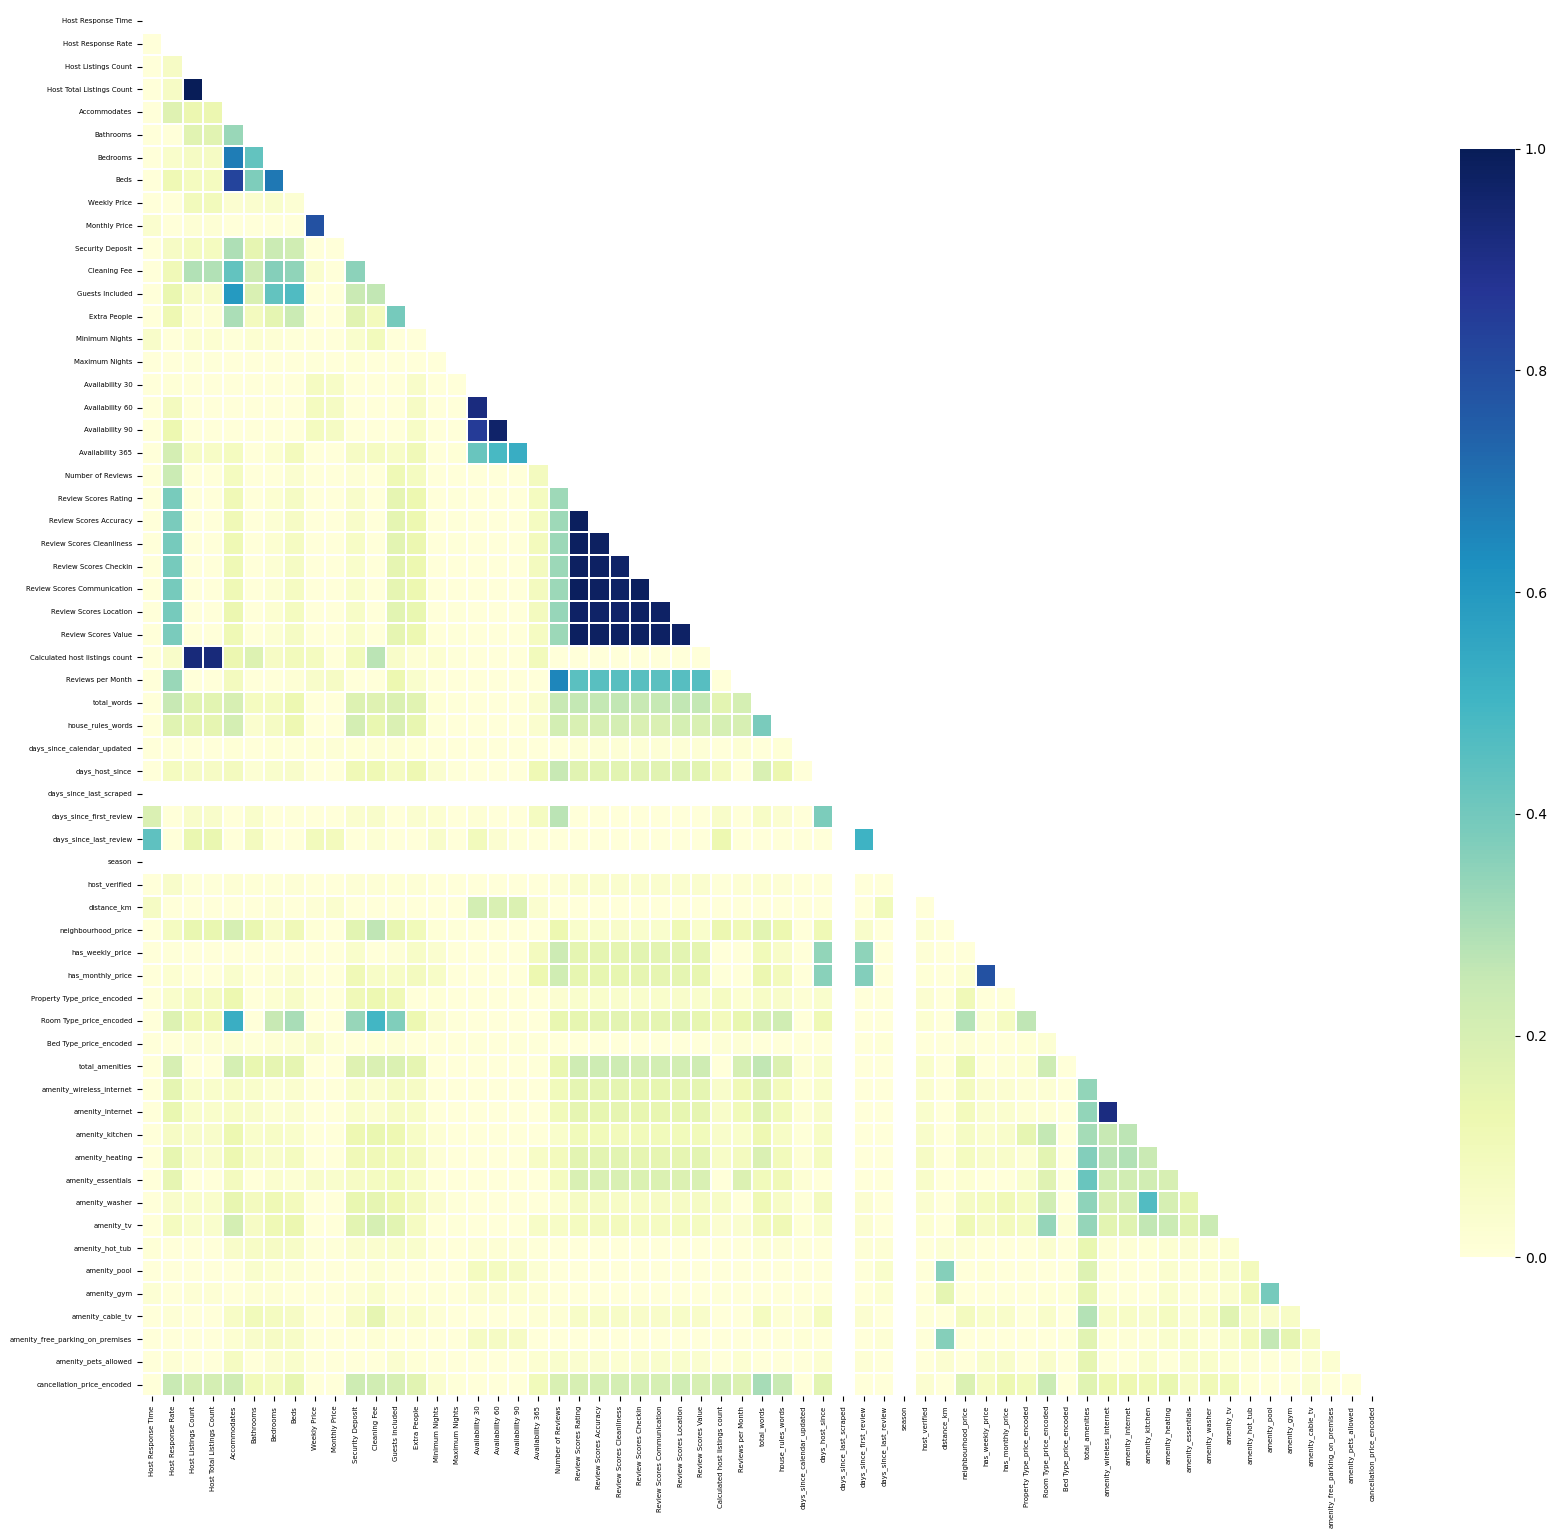

In [62]:
# Comencemos con la correlacion
import seaborn as sns
import matplotlib.pyplot as plt

corr = np.abs(X_train).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(20, 18))  # Ajusta los valores según sea necesario

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

# Reducir el tamaño de la fuente de las etiquetas
ax.tick_params(axis='x', labelsize=5)  # Ajusta el tamaño de la fuente según sea necesario
ax.tick_params(axis='y', labelsize=5)

# Rotar las etiquetas del eje x
plt.xticks(rotation=90)  # Rota las etiquetas 90 grados

plt.show()

Gracias a la matriz de correlación podemos ver y quitar columnas de más

**Grupo 1**
- Calculated Host Listings Count 
- Host Listings Count
- Host Total Listings Count

**Gupo 2**
- Availability 30
- Availability 60
- Availability 90
- Availability 365

**Grupo 3**
- Review Scores Value
- Review Scores Rating
- Review Scores Accuracy
- Review Scores Cleanliness
- Review Scores Checkin
- Review Scores Communication
- Review Scores Location

Grupo 4
- amenity_wireless_internet
- amenity_internet

In [64]:
list_to_drop_corr = ['Host Listings Count', 'Host Total Listings Count', 'Availability 60', 'Availability 90',
'Availability 365', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
'Review Scores Communication', 'Review Scores Location', 'amenity_internet' ]

X_train.drop(columns=list_to_drop_corr, axis=1, inplace=True)

In [65]:
X_train.shape

(9927, 49)

In [66]:
y_train.describe()

count    9927.000000
mean       65.523018
std        55.528747
min         9.000000
25%        30.000000
50%        52.000000
75%        80.000000
max       875.000000
Name: Price, dtype: float64

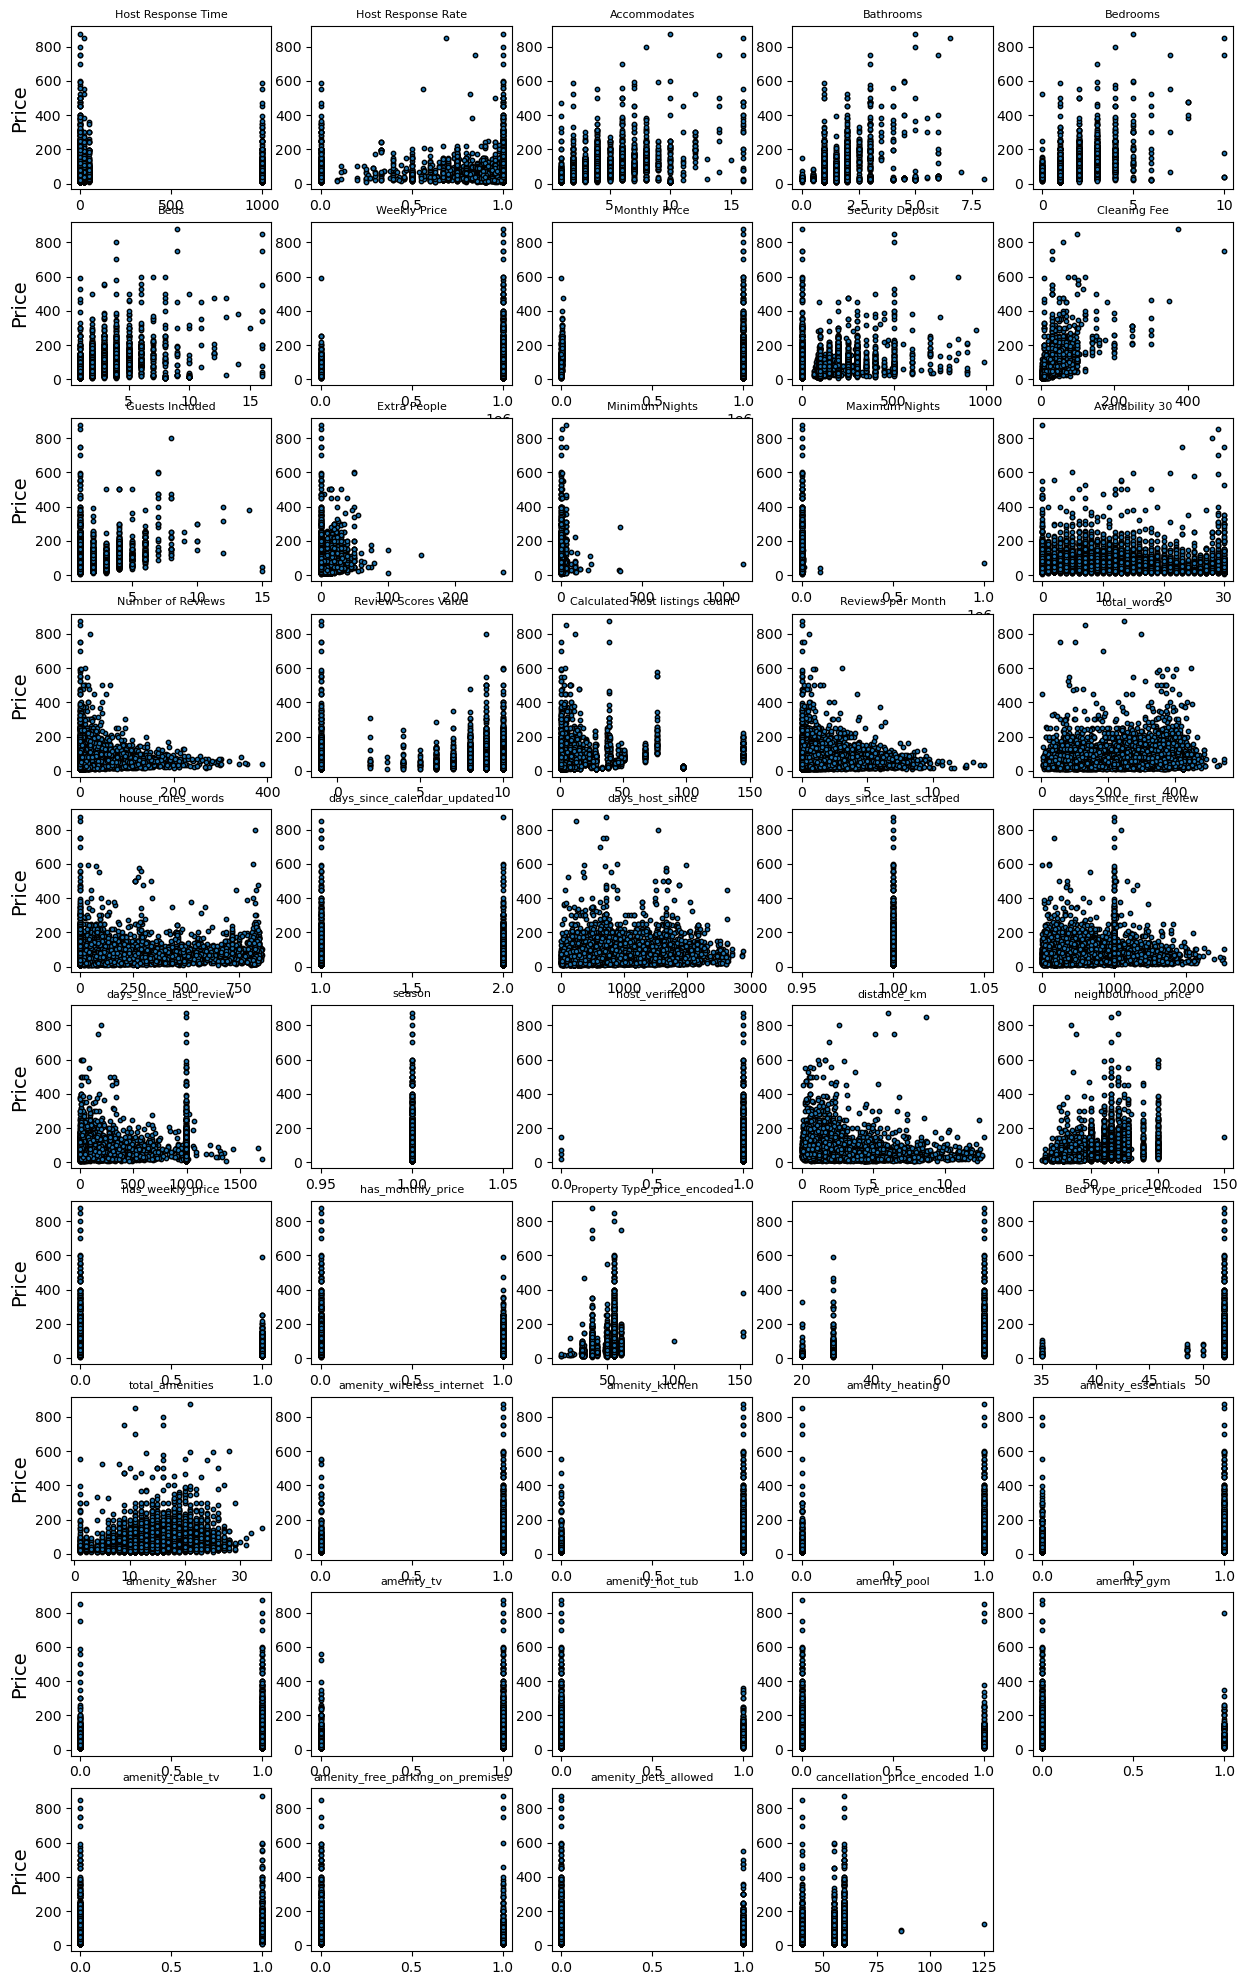

In [67]:
# Visualización
plt.figure(figsize=(15, 25))
i = 0
for columna in X_train.columns:
    plt.subplot(10, 5, i + 1)
    plt.scatter(X_train[columna], y_train, edgecolor='black', s=10)
    #plt.xlabel(columna, fontsize=8)
    if i%5 == 0:
        plt.ylabel("Price", fontsize=14)
    plt.title(columna,fontsize=8)
    i = i + 1
plt.show()

Ufff con visualización se puede descartar algunos, para comenzar:
- season, no aporta nada, todas las fechas tenían la misma temporalidad.
- days since last scraped, solo una línea, no aporta nada!

Me ha sorprendido que Accommodates, Bathrooms, Bedrooms, Beds y total_amenities presentan ese triangulo, en que se ve cierta correlación con el precio, pero en algún punto se pierde y comienza a bajar, se me ocurre así como en la práctica 3.1 se solucionó relancinando beds con bathrooms. 

In [69]:
list_to_drop_visual = ['season', 'days_since_last_scraped']

X_train.drop(columns=list_to_drop_visual, axis=1, inplace=True)

A continuación mis experimentos para mejorar los triangulos

In [71]:
X_train['total_amenities_log'] =X_train['total_amenities'].apply(np.log)

In [72]:
triangulos_val =  ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds']
X_train['triangulos_suma'] = X_train[triangulos_val].sum(axis=1).apply(np.log)

### 3.2 Usamos Random Forest para definir campos

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best mean cross-validation score: 0.163
best parameters: {'max_depth': 21}


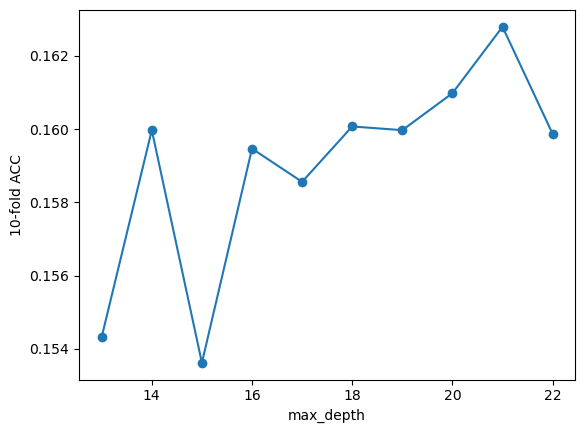

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

maxDepth = range(13,23) # comencé de 1 a 15 y la tendencia termino en subiendo, con un score muy muy bajo!!! así que permito más rangos
tuned_parameters = {'max_depth': maxDepth}

# ... código aquí
grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=tuned_parameters, cv = 5)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

### Aplicar a test los cambios de train

In [76]:
from datetime import timedelta
from datetime import datetime
import math

text_cols = ['Name', 'Summary', 'Space', 'Description']
X_test[text_cols] = X_test[text_cols].fillna("")
X_test['total_words'] = X_test[text_cols].apply(lambda x: sum(len(text.split()) for text in x), axis=1)
X_test.drop(text_cols, axis=1, inplace=True)
text_cols = ['Notes', 'Transit', 'Access', 'Interaction', 'House Rules']
X_test['House Rules'] = X_test['House Rules'].fillna("")
X_test['house_rules_words'] = X_test['House Rules'].apply( lambda x: sum(len(text.split()) for text in x) )
X_test.drop(text_cols, axis=1, inplace=True)
X_test['Host Response Time'] = X_test['Host Response Time'].map(response_time_map).fillna(999).astype(int)
X_test['Calendar Updated'] = pd.to_datetime(X_test['Calendar Updated'], errors='coerce')
X_test['days_since_calendar_updated'] = (test_now - X_test['Calendar Updated']).dt.days
X_test['days_since_calendar_updated'] = X_test['days_since_calendar_updated'].fillna(999)
X_test.drop('Calendar Updated', axis=1, inplace=True)
date_cols = ['Last Scraped', 'Host Since', 'Calendar last Scraped', 'First Review', 'Last Review']
X_test[date_cols] = X_test[date_cols].apply(pd.to_datetime, errors='coerce')
############################# VAIABLE PARA TEST
#print(max_date_train) # para el test
X_test['days_host_since'] = (max_date_train - X_test['Host Since']).dt.days
X_test['days_since_last_scraped'] = (max_date_train - X_test['Last Scraped']).dt.days
X_test['days_since_calendar_updated'] = (max_date_train - X_test['Calendar last Scraped']).dt.days
X_test['days_since_first_review'] = (max_date_train - X_test['First Review']).dt.days
X_test['days_since_last_review'] = (max_date_train - X_test['Last Review']).dt.days
time_features = ['days_host_since', 'days_since_last_scraped', 'days_since_calendar_updated', 
                 'days_since_first_review', 'days_since_last_review']
X_test[time_features] = X_test[time_features].fillna(999).astype(int)
X_test['season'] = X_test['Calendar last Scraped'].dt.month.apply(get_season)
X_test.drop(date_cols, axis=1, inplace=True)
X_test['host_verified'] = X_test['Host Verifications'].notnull().astype(int)
X_test.drop('Host Verifications', axis=1, inplace=True)
X_test['distance_km'] = X_test.apply(lambda row: haversine(row['Latitude'], row['Longitude']) if pd.notnull(row['Latitude']) else -1, axis=1)
############################# VAIABLE PARA TEST
# neighPrice = X_train['Neighbourhood Cleansed'].to_frame().join(y_train)
# neigh_price_map_train = neighPrice.groupby('Neighbourhood Cleansed')['Price'].median()
X_test['neighbourhood_price'] = X_test['Neighbourhood Cleansed'].map(neigh_price_map_train)
############################# VAIABLE PARA TEST
# meian_price_train = y_train.median()
X_test['neighbourhood_price'] = X_test['neighbourhood_price'].fillna(meian_price_train)
location_cols = ['Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Neighborhood Overview',
                 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 
                 'Latitude', 'Longitude']
X_test.drop(location_cols, axis=1, inplace=True)
X_test['has_weekly_price'] = X_test['Weekly Price'].notnull().astype(int)
X_test['has_monthly_price'] = X_test['Monthly Price'].notnull().astype(int)
X_test['Weekly Price'] = X_test['Weekly Price'].fillna(999999)
X_test['Monthly Price'] = X_test['Monthly Price'].fillna(999999)
X_test['Security Deposit'] = X_test['Security Deposit'].fillna(0)
X_test['Cleaning Fee'] = X_test.groupby('Room Type')['Cleaning Fee'].transform(lambda x: x.fillna(x.median()))
bathBed = ['Bathrooms', 'Bedrooms', 'Beds']
X_test.loc[(X_test['Room Type'] == 'Entire home/apt') & (X_test['Bathrooms'].isnull()), 'Bathrooms'] = X_test['Bathrooms'].median()
X_test.loc[(X_test['Room Type'] == 'Entire home/apt') & (X_test['Bedrooms'].isnull()), 'Bedrooms'] = X_test['Bedrooms'].median()
X_test.loc[(X_test['Room Type'] == 'Entire home/apt') & (X_test['Beds'].isnull()), 'Beds'] = X_test['Beds'].median()
X_test.loc[(X_test['Room Type'] == 'Private room') & (X_test['Bathrooms'].isnull()), 'Bathrooms'] = 1
X_test.loc[(X_test['Room Type'] == 'Private room') & (X_test['Bedrooms'].isnull()), 'Bedrooms'] = 1
X_test.loc[(X_test['Room Type'] == 'Private room') & (X_test['Beds'].isnull()), 'Beds'] = 1
X_test.loc[(X_test['Room Type'] == 'Shared room') & (X_test['Bathrooms'].isnull()), 'Bathrooms'] = 1
X_test.loc[(X_test['Room Type'] == 'Shared room') & (X_test['Bedrooms'].isnull()), 'Bedrooms'] = 1
X_test.loc[(X_test['Room Type'] == 'Shared room') & (X_test['Beds'].isnull()), 'Beds'] = 1
X_test['Host Response Rate'] = X_test['Host Response Rate'].fillna(0).astype(float) / 100
X_test.drop('Host Neighbourhood', axis=1, inplace=True)
X_test['Host Listings Count'] = X_test['Host Listings Count'].fillna(0)
X_test['Host Total Listings Count'] = X_test['Host Total Listings Count'].fillna(0)
encode_cols = ['Property Type', 'Room Type', 'Bed Type']
col = 'Property Type'
############################# VAIABLE PARA TEST
# price_map_train_Property_Type = colPrice.groupby(col)['Price'].median()
X_test[f'{col}_price_encoded'] = X_test[col].map(price_map_train_Property_Type)
X_test[f'{col}_price_encoded'] = X_test[f'{col}_price_encoded'].fillna(meian_price_train)
col = 'Room Type'
############################# VAIABLE PARA TEST
# price_map_train_Room_Type = colPrice.groupby(col)['Price'].median()
X_test[f'{col}_price_encoded'] = X_test[col].map(price_map_train_Room_Type)
X_test[f'{col}_price_encoded'] = X_test[f'{col}_price_encoded'].fillna(meian_price_train)
col = 'Bed Type'
############################# VAIABLE PARA TEST
# price_map_train_Bed_Type = colPrice.groupby(col)['Price'].median()
X_test[f'{col}_price_encoded'] = X_test[col].map(price_map_train_Bed_Type)
X_test[f'{col}_price_encoded'] = X_test[f'{col}_price_encoded'].fillna(meian_price_train)
X_test.drop(encode_cols, axis=1, inplace=True)
X_test['Amenities'] = X_test['Amenities'].fillna("")
X_test['total_amenities'] = X_test['Amenities'].apply(lambda x: len(x.split(',')))
############################# VAIABLE PARA TEST
# top_amenities = ['Wireless Internet', 'Internet', 'Kitchen', 'Heating', 'Essentials', 'Washer', 'TV',  # Primero por moda
#                 'Hot tub', 'Pool', 'Gym', 'Cable TV', 'Free parking on premises', 'Pets allowed'] # ahora por los articulo que vi
for amenity in top_amenities:
    X_test[f'amenity_{amenity.lower().replace(" ", "_")}'] = X_test['Amenities'].apply(lambda x: int(amenity in x))
# al final lo dropeamos
X_test.drop('Amenities', axis=1, inplace=True)
review_cols = ['Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness',
               'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 
               'Review Scores Value']
X_test[review_cols] = X_test[review_cols].fillna(-1)
X_test['Reviews per Month'] = X_test['Reviews per Month'].fillna(0)
############################# VAIABLE PARA TEST
# cancel_policy_map_train = cancelation_price.groupby('Cancellation Policy')['Price'].median()
X_test['cancellation_price_encoded'] = X_test['Cancellation Policy'].map(cancel_policy_map_train)
X_test['cancellation_price_encoded'] = X_test['cancellation_price_encoded'].fillna(meian_price_train)
X_test.drop('Cancellation Policy', axis=1, inplace=True)
list_to_drop_corr = ['Host Listings Count', 'Host Total Listings Count', 'Availability 60', 'Availability 90',
'Availability 365', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
'Review Scores Communication', 'Review Scores Location', 'amenity_internet' ]
X_test.drop(columns=list_to_drop_corr, axis=1, inplace=True)
list_to_drop_visual = ['season', 'days_since_last_scraped']
X_test.drop(columns=list_to_drop_visual, axis=1, inplace=True)
X_test['total_amenities_log'] =X_test['total_amenities'].apply(np.log)
triangulos_val =  ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds']
X_test['triangulos_suma'] = X_test[triangulos_val].sum(axis=1).apply(np.log)

C:\Users\NitroPC\AppData\Local\Temp\ipykernel_44428\15471007.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_test['Calendar Updated'] = pd.to_datetime(X_test['Calendar Updated'], errors='coerce')


### Seguimos:

In [78]:
# los resultados son pesimos, creo que intentaré otras cosas, pero bueno, ya que hice Random Forest termino
from sklearn.ensemble import RandomForestClassifier

maxDepthOptimo = 15 # grid.best_params_['max_depth'] Usaré 15 para bajar complejidad, después de todo la diferencia es mínima
randomForest = RandomForestClassifier(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ", randomForest.score(X_test,y_test))

Train:  0.9554749672610053
Test:  0.15200967059534604


Un desastre!!!! WTF!!!

### 3.3 Intentemos embedded

In [80]:
from sklearn import preprocessing
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.504e+06, tolerance: 2.372e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................................alpha=1e-10; total time=   0.5s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.281e+06, tolerance: 2.399e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................................alpha=1e-10; total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.737e+06, tolerance: 2.485e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................................alpha=1e-10; total time=   0.6s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.594e+06, tolerance: 2.468e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................................alpha=1e-10; total time=   0.6s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.823e+06, tolerance: 2.519e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................................alpha=1e-10; total time=   0.6s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.504e+06, tolerance: 2.372e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=1.6681005372000592e-08; total time=   0.5s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.281e+06, tolerance: 2.399e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=1.6681005372000592e-08; total time=   0.7s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.737e+06, tolerance: 2.485e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=1.6681005372000592e-08; total time=   0.6s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.594e+06, tolerance: 2.468e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=1.6681005372000592e-08; total time=   0.7s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.823e+06, tolerance: 2.519e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=1.6681005372000592e-08; total time=   1.4s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.498e+06, tolerance: 2.372e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=2.782559402207126e-06; total time=   1.4s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.275e+06, tolerance: 2.399e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=2.782559402207126e-06; total time=   1.4s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.728e+06, tolerance: 2.485e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=2.782559402207126e-06; total time=   1.4s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.587e+06, tolerance: 2.468e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=2.782559402207126e-06; total time=   1.0s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.814e+06, tolerance: 2.519e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=2.782559402207126e-06; total time=   0.6s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.304e+06, tolerance: 2.372e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0004641588833612782; total time=   0.4s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.111e+06, tolerance: 2.399e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0004641588833612782; total time=   0.5s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.057e+06, tolerance: 2.485e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0004641588833612782; total time=   0.5s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.208e+06, tolerance: 2.468e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0004641588833612782; total time=   0.5s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.165e+06, tolerance: 2.519e+03
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0004641588833612782; total time=   0.5s
[CV] END ..........................alpha=0.07742636826811278; total time=   0.0s
[CV] END ..........................alpha=0.07742636826811278; total time=   0.0s
[CV] END ..........................alpha=0.07742636826811278; total time=   0.0s
[CV] END ..........................alpha=0.07742636826811278; total time=   0.0s
[CV] END ..........................alpha=0.07742636826811278; total time=   0.0s
[CV] END ...........................alpha=12.915496650148826; total time=   0.0s
[CV] END ...........................alpha=12.915496650148826; total time=   0.0s
[CV] END ...........................alpha=12.915496650148826; total time=   0.0s
[CV] END ...........................alpha=12.915496650148826; total time=   0.0s
[CV] END ...........................alpha=12.915496650148826; total time=   0.0s
[CV] END ...........................alpha=2154.4346900318865; total time=   0.0s
[CV] END ...................

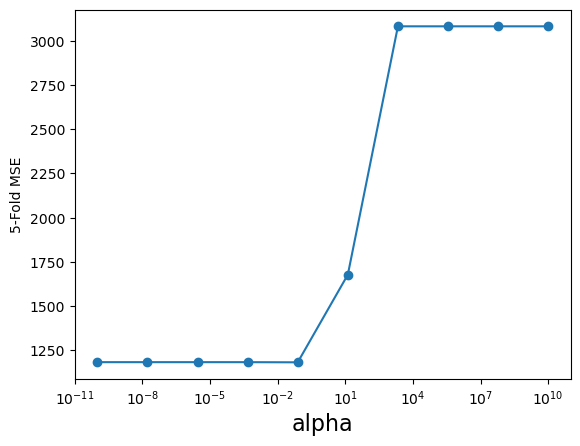

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-10,10,10) 
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [82]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(X_train.columns[1:],w):
    print(f,wi)

MSE Modelo Lasso (train): 1.16e+03
MSE Modelo Lasso (test) : 1.65e+03
RMSE Modelo Lasso (train): 34
RMSE Modelo Lasso (test) : 40.6
Host Response Rate -0.0
Accommodates -1.4165378042490535
Bathrooms 20.021436880181987
Bedrooms 8.614733155727658
Beds 13.554174643202144
Weekly Price 2.1735476231840014
Monthly Price 1.7260701399354372
Security Deposit 0.22848910456809118
Cleaning Fee 0.04078438642040318
Guests Included 17.334642239006094
Extra People 2.1795355728369636
Minimum Nights -2.747065821248272
Maximum Nights -0.5282569149373829
Availability 30 0.0
Number of Reviews 5.568192043922836
Review Scores Value -0.1401535438828624
Calculated host listings count 1.750220890893125
Reviews per Month -1.0306532780231001
total_words -1.9490924386514092
house_rules_words 0.9459608270215223
days_since_calendar_updated -0.6735265496374351
days_host_since 0.11268150808238403
days_since_first_review 1.1498579623030731
days_since_last_review 0.0
host_verified 4.62654446927883
distance_km -0.48987223

Con esta respuesta me puedo hacer a una idea de cuales son mejores, pero quiero intentar Ridge Regression

Sugerido por ChatGPT :D hasta ahora ha sido mínimo su uso 

In [84]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1️⃣ **Tuning Ridge Regression**
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Different levels of regularization
ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
ridge_grid.fit(X_train, y_train)

best_ridge = ridge_grid.best_estimator_
print(f"Best Ridge Alpha: {ridge_grid.best_params_['alpha']}")

# 2️⃣ **Tuning Gradient Boosting Regressor (GBM)**
gbm_params = {
    'n_estimators': [100, 200],  
    'learning_rate': [0.05, 0.1],  
    'max_depth': [3, 5]  
}
gbm_grid = GridSearchCV(GradientBoostingRegressor(), gbm_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
gbm_grid.fit(X_train, y_train)

best_gbm = gbm_grid.best_estimator_
print(f"Best GBM Params: {gbm_grid.best_params_}")

# 3️⃣ **Model Evaluation Function**
def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        "R² Train": r2_score(y_train, y_train_pred),
        "R² Test": r2_score(y_test, y_test_pred),
        "MAE Train": mean_absolute_error(y_train, y_train_pred),
        "MAE Test": mean_absolute_error(y_test, y_test_pred),
        "RMSE Train": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "RMSE Test": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    }
    
    print(f'\n{name} Performance:')
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# 4️⃣ **Evaluate Both Models**
evaluate_model(best_ridge, X_train, y_train, X_test, y_test, "Ridge Regression")
evaluate_model(best_gbm, X_train, y_train, X_test, y_test, "Gradient Boosting")

# 5️⃣ **Feature Importance for GBM**
feature_importances = pd.Series(best_gbm.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("\nTop 10 Features (GBM):")
print(feature_importances.head(10))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.94271e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Best Ridge Alpha: 0.01
Best GBM Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Ridge Regression Performance:
R² Train: 0.6255
R² Test: 0.4982
MAE Train: 18.9636
MAE Test: 20.1150
RMSE Train: 33.9808
RMSE Test: 40.5820

Gradient Boosting Performance:
R² Train: 0.9199
R² Test: 0.6136
MAE Train: 10.1713
MAE Test: 15.7318
RMSE Train: 15.7157
RMSE Test: 35.6124

Top 10 Features (GBM):
triangulos_suma            0.170456
Cleaning Fee               0.157833
Bathrooms                  0.137200
Bedrooms                   0.116212
Room Type_price_encoded    0.081001
Accommodates               0.047473
Availability 30            0.038630
neighbourhood_price        0.032486
Extra People               0.021419
distance_km                0.018886
dtype: float64


C:\Users\NitroPC\AppData\Local\Temp\ipykernel_44428\461461023.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette="viridis")


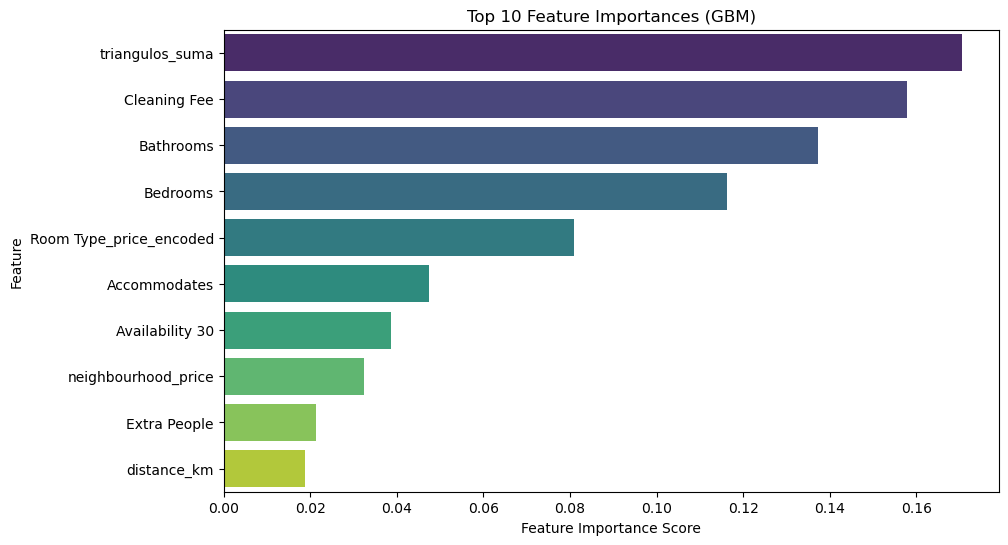

In [85]:
# Sort feature importances
feature_importances = pd.Series(best_gbm.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances (GBM)")
plt.show()

Mi idea de triangulos_suma fue buena!
Auque tiene mejor pinta, Bathrooms y Bedroom creo que convendrá escalarlos, también lo inentaré con Cleaning Fee

Best GBM Params: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300}

Optimized Gradient Boosting Performance:
R² Train: 0.9406
R² Test: 0.5959
MAE Train: 9.1765
MAE Test: 16.2088
RMSE Train: 13.5339
RMSE Test: 36.4174


C:\Users\NitroPC\AppData\Local\Temp\ipykernel_44428\391600240.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette="viridis")


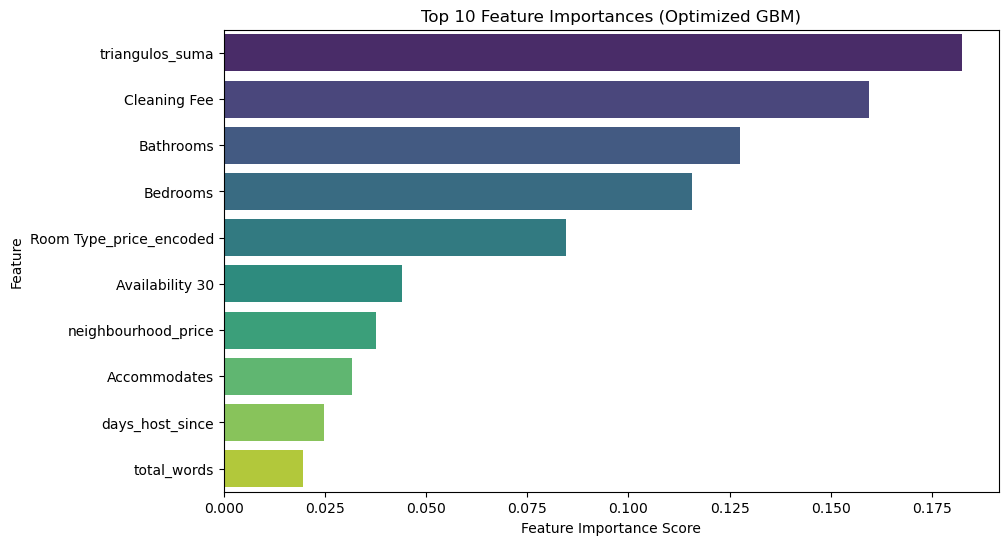

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1️⃣ **Feature Scaling & Normalization (CORRECTED)**  <--- si ya me estaba cometiendo leakage lo corregí de tu parte
scaler = StandardScaler().fit(X_train[['Cleaning Fee']])  # Fit on training data only
X_train['Cleaning Fee'] = scaler.transform(X_train[['Cleaning Fee']])
X_test['Cleaning Fee'] = scaler.transform(X_test[['Cleaning Fee']])  # Transform using the same scaler

minmax_scaler = MinMaxScaler().fit(X_train[['Bathrooms', 'Bedrooms']])  # Fit on training data only
X_train[['Bathrooms', 'Bedrooms']] = minmax_scaler.transform(X_train[['Bathrooms', 'Bedrooms']])
X_test[['Bathrooms', 'Bedrooms']] = minmax_scaler.transform(X_test[['Bathrooms', 'Bedrooms']])  # Transform using the same scaler

# 2️⃣ **Retrain GBM Model** <--- modifique los valores debido a los resultados del anterior
gbm_params = {
    'n_estimators': [200, 300],  
    'learning_rate': [0.05, 0.2],  
    'max_depth': [4, 8]
}
gbm_grid = GridSearchCV(GradientBoostingRegressor(), gbm_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
gbm_grid.fit(X_train, y_train)

best_gbm = gbm_grid.best_estimator_
print(f"Best GBM Params: {gbm_grid.best_params_}")

# 3️⃣ **Model Evaluation Function** <-- Lo demás es presentación así que no lo toco, me fio de gpt
def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        "R² Train": r2_score(y_train, y_train_pred),
        "R² Test": r2_score(y_test, y_test_pred),
        "MAE Train": mean_absolute_error(y_train, y_train_pred),
        "MAE Test": mean_absolute_error(y_test, y_test_pred),
        "RMSE Train": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "RMSE Test": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    }
    
    print(f'\n{name} Performance:')
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# 4️⃣ **Evaluate Optimized GBM**
evaluate_model(best_gbm, X_train, y_train, X_test, y_test, "Optimized Gradient Boosting")

# 5️⃣ **Feature Importance Plot**
feature_importances = pd.Series(best_gbm.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances (Optimized GBM)")
plt.show()


Creto que puedo parar con el prepocesamiento y comenzar con el Modelado, pero antes guardaré en ficheros CSV lo logrado:

In [89]:
top_5_features = ['triangulos_suma', 'Cleaning Fee', 'Bathrooms', 'Bedrooms', 'Room Type_price_encoded']

# ahora trabajaré con estos
X_train_top5 = X_train[top_5_features]
X_test_top5 = X_test[top_5_features]

# Guardamos
X_train_top5.to_csv('./X_train_4.csv', index=False)
X_test_top5.to_csv('./X_test_4.csv', index=False)

## 4 Modelado!

### 4.1 Descicion tree

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END .....................................

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ...................

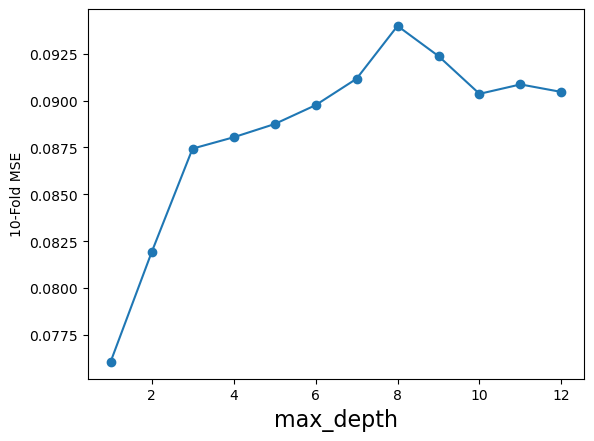

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

maxDepth = range(1,13)
param_grid = {'max_depth': maxDepth}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv = 10, verbose=2)
grid.fit(X_train_top5, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [107]:
maxDepthOptimo = grid.best_params_['max_depth'] 
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(X_train_top5,y_train)

print("Train: ", treeModel.score(X_train_top5, y_train))
print("Test: ", treeModel.score(X_test_top5, y_test))

Train:  0.123904502870958
Test:  0.0843155031731641


O por Dios!!! esto es un desastre!!!

### 4.2 Boosted Trees - Salvanos por favor

In [147]:
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [50,100,200]
learningRate = [0.5,0.05,0.01]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=4), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END .................learning_rate=0.5, n_estimators=50; total time= 5.5min
[CV] END .................learning_rate=0.5, n_estimators=50; total time= 5.4min
[CV] END .................learning_rate=0.5, n_estimators=50; total time= 5.3min
[CV] END ................learning_rate=0.5, n_estimators=100; total time=10.6min
[CV] END ................learning_rate=0.5, n_estimators=100; total time=10.6min
[CV] END ................learning_rate=0.5, n_estimators=100; total time=10.5min
[CV] END ................learning_rate=0.5, n_estimators=200; total time=23.1min
[CV] END ................learning_rate=0.5, n_estimators=200; total time=21.1min
[CV] END ................learning_rate=0.5, n_estimators=200; total time=20.1min
[CV] END ................learning_rate=0.05, n_estimators=50; total time= 7.3min
[CV] END ................learning_rate=0.05, n_estimators=50; total time= 7.1min
[CV] END ................learning_rate=0.05, n_estimators=50; total time= 7.3min
[CV] END ...............lear

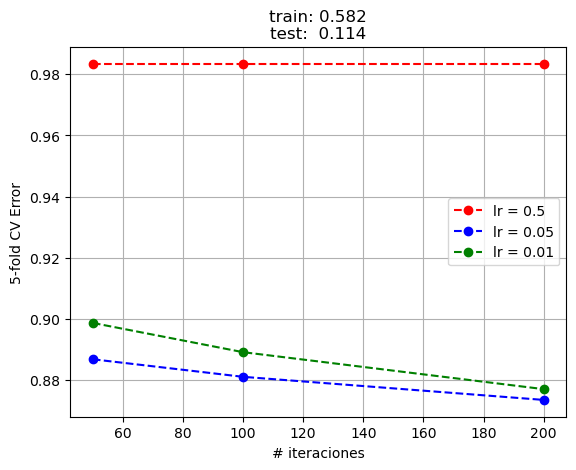

In [152]:
# calculamos métricas globales
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingClassifier(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [163]:
print("Train: ",bt.score(X_train,y_train))
print("Test: ",bt.score(X_test,y_test))

Train:  0.5816460159161881
Test:  0.1139317014203687


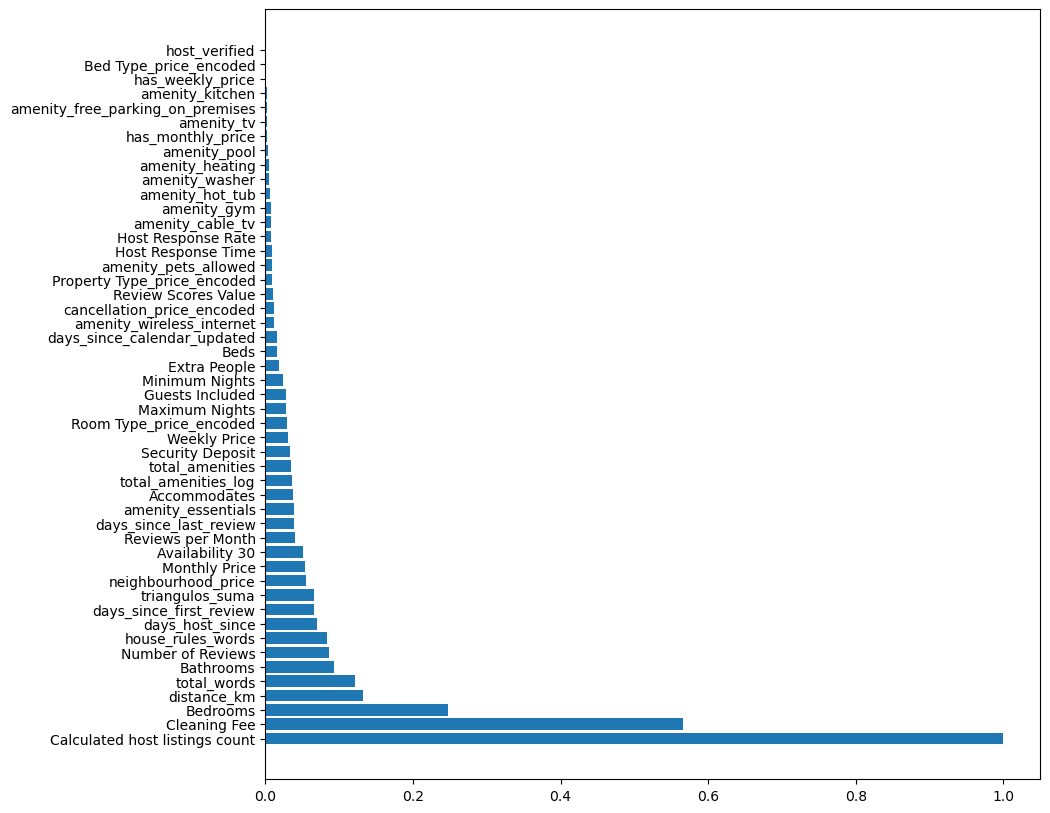

In [157]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),X_train.columns[indices])
plt.show()

In [159]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]  
learningRate = [0.05,0.1,0.15,0.2]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ...............learning_rate=0.05, n_estimators=500; total time=  13.3s
[CV] END ...............learning_rate=0.05, n_estimators=500; total time=  13.2s
[CV] END ...............learning_rate=0.05, n_estimators=500; total time=  13.4s
[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=  26.9s
[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=  26.1s
[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=  26.2s
[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=  40.0s
[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=  39.4s
[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=  39.1s
[CV] END ..............learning_rate=0.05, n_estimators=2000; total time=  51.9s
[CV] END ..............learning_rate=0.05, n_estimators=2000; total time=  51.8s
[CV] END ..............learning_rate=0.05, n_est

In [160]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
baggingModel = GradientBoostingRegressor(max_depth=3, n_estimators=neOptimo, learning_rate=lrOptimo).fit(X_train,y_train)

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

Train:  0.9618360197618985
Test:  0.607713471397437


Lo mejor hasta ahora, anque hay que decir que use todos los campos, seguro que encuentro mejores estimadores, 
pero tarda demaciado

### 4.3 Bagging 
Comienzo a pensar que no hay salvación

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

maxDepth = range(1,15)
tuned_parameters = {'base_estimator__max_depth': maxDepth}

grid = GridSearchCV(BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=150 ,random_state=0), param_grid=tuned_parameters, cv = 10, verbose=2)
grid.fit(X_train_top5, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [145]:
maxDepthOptimo = 4 #grid.best_params_['base_estimator__max_depth']
baggingModel = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=maxDepthOptimo),n_estimators=150).fit(X_train_top5,y_train)

print("Train: ",baggingModel.score(X_train_top5,y_train))
print("Test: ",baggingModel.score(X_test_top5,y_test))

Train:  0.10033242671501964
Test:  0.08643094590510729


## 5. Colcluciones

A pesar de que los modelos no lograron altos niveles de precisión, el objetivo del proyecto no era obtener el mejor modelo, sino aprender del proceso.

Aunque los modelos no alcanzaron una precisión óptima, este proyecto ha sido un valioso ejercicio de aprendizaje, especialmente al ser mi primera experiencia en ML y ciencia de datos. Comprendí la importancia crítica del preprocesamiento de datos, exploré diversas estrategias de modelado y confirmé que la metodología y la justificación son fundamentales. En el futuro, planeo profundizar en la optimización de hiperparámetros y la exploración de nuevos modelos, buscando mejorar los resultados y continuar mi desarrollo en este campo.